In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [5]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [6]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

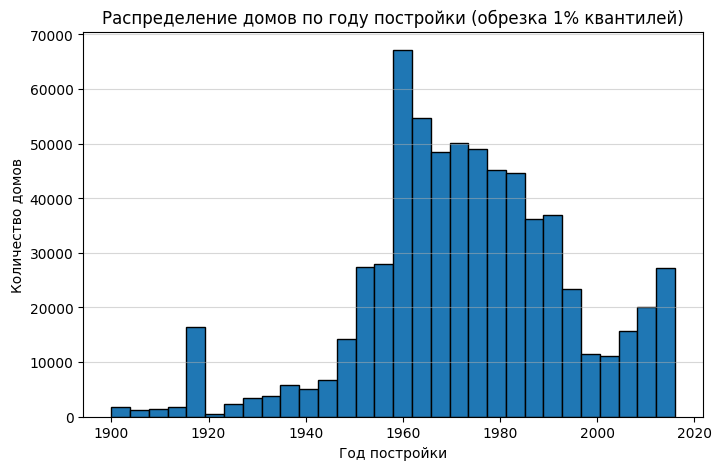

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [8]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


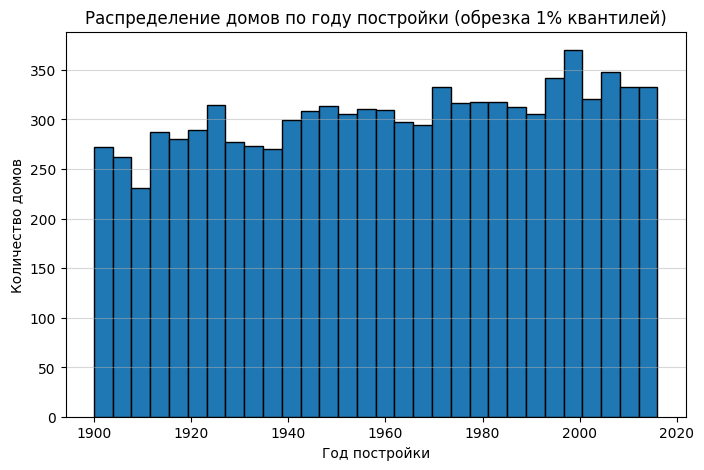

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [10]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [11]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [12]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [13]:
regions = [
    "Белгородская",
    "Брянская",
    "Владимирская",
    "Воронежская",
    "Москва",
    "Ивановская",
    "Калужская",
    "Костромская",
    "Курская",
    "Липецкая",
    "Московская",
    "Орловская",
    "Рязанская",
    "Смоленская",
    "Тамбовская",
    "Тверская",
    "Тульская",
    "Ярославская"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [14]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
232197,Белгородская,1967.0,F,308.1
232198,Белгородская,NaN,F,1707.3
232199,Белгородская,1964.0,E,1354.4
232200,Белгородская,1963.0,E,1358.8
232201,Белгородская,1964.0,F,711.4
...,...,...,...,...
1014239,Москва,1997.0,E,14852.6
1014240,Москва,1998.0,E,14851.6
1014241,Москва,1995.0,E,7305.0
1014242,Москва,1995.0,E,7332.0


In [15]:
df_cut.isna().sum()

formalname_region        0
built_year           64239
energy_efficiency        0
area_total           24528
dtype: int64

In [16]:
df_cut_cleaned = df_cut.dropna()


In [17]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_15204\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [18]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
232197,Белгородская,1967.0,F,308.1,462.15
232199,Белгородская,1964.0,E,1354.4,1693.00
232200,Белгородская,1963.0,E,1358.8,1698.50
232201,Белгородская,1964.0,F,711.4,1067.10
232202,Белгородская,1965.0,E,1364.0,1705.00
...,...,...,...,...,...
1014239,Москва,1997.0,E,14852.6,18565.75
1014240,Москва,1998.0,E,14851.6,18564.50
1014241,Москва,1995.0,E,7305.0,9131.25
1014242,Москва,1995.0,E,7332.0,9165.00


In [19]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [20]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Белгородская,1800.0,D,158.700
1,Белгородская,1856.0,D,273.600
2,Белгородская,1864.0,E,319.375
3,Белгородская,1870.0,D,245.300
4,Белгородская,1871.0,D,88.500
...,...,...,...,...
9195,Ярославская,2018.0,B,3072.230
9196,Ярославская,2018.0,C,8663.370
9197,Ярославская,2019.0,B++,6035.211
9198,Ярославская,2019.0,C,9375.160


In [21]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,1800.0,158.700,1.587000e+02
1,Белгородская,1856.0,273.600,4.323000e+02
2,Белгородская,1864.0,319.375,7.516750e+02
3,Белгородская,1870.0,245.300,9.969750e+02
4,Белгородская,1871.0,88.500,1.085475e+03
...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07
2307,Ярославская,2017.0,234482.290,2.681747e+07
2308,Ярославская,2018.0,11735.600,2.682920e+07
2309,Ярославская,2019.0,15410.371,2.684461e+07


In [22]:
df_grouped[(df_grouped['formalname_region'] == 'Москва') & (df_grouped['built_year'] == 1999)] 

,formalname_region,built_year,area_eff,area_eff_cumsum
1237,Москва,1999.0,3666273.91,2.320383e+08


In [23]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,1800.0,158.700,158.700
1,Белгородская,1856.0,273.600,432.300
2,Белгородская,1864.0,319.375,751.675
3,Белгородская,1870.0,245.300,996.975
4,Белгородская,1871.0,88.500,1085.475


In [24]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -8.36, -8.03, -8.49, -8.54, -8.10, -8.22, -8.07, -8.82, -8.09, -8.71,
        -8.67, -8.63, -8.19, -8.39, -8.48, -8.40, -8.51, -8.49, -8.65, -8.09,
        -8.14, -8.37, -8.17, -8.67, -9.28, -7.68, -7.85, -7.84, -7.85, -7.83,
        -6.79, -7.98, -7.50, -8.22, -7.95, -7.78, -7.19, -7.28, -7.81, -7.38,
        -6.96, -7.16, -6.88, -6.89, -7.23, -6.88, -6.45, -7.06, -6.08, -6.60,
        -6.70, -6.91, -7.23, -6.08, -6.10, -6.71, -5.91, -5.68, -6.24, -6.06,
        -5.68, -6.43, -4.98, -6.11, -6.45, -5.31, -6.05, -5.09, -5.04, -5.35,
        -5.70, -5.29, -5.06, -4.96, -5.44, -5.04, -4.87, -5.28, -4.96, -5.19,
        -4.13, -4.39, -4.79, -5.08, -4.96, -4.83, -5.78, -4.43, -3.91, -4.73,
        -3.97, -4.61, -4.97, -3.96, -4.23, -4.68, -4.22, -4.24, -4.61, -3.85,
        -4.08
    ]
}

df_cfo_climate = pd.DataFrame(data_climate)
df_cfo_climate

,Год,Зима
0,1960,-8.36
1,1961,-8.03
2,1962,-8.49
3,1963,-8.54
4,1964,-8.10
...,...,...
96,2056,-4.22
97,2057,-4.24
98,2058,-4.61
99,2059,-3.85


In [25]:

data_region_heat = {
    "Белгородская область": [
        3272.1, 3326.7, 2679.4, 3632, 3464.8, 3493.4, 3402.6, 3476.3, 3429.0, 3568.6,
        3636.7, 3764.1, 3632.4, 3367.0, 3376.9, 3211.1, 3295.9, 3183.3, 3343, 2848.89,
        2810.21, 3068.85, 3018.6, 2862.6, 2695.9
    ],
    "Брянская область": [
        2005.8, 2192, 2312.3, 2396.1, 2339.1, 2366.5, 2406.5, 2209.5, 2167.4, 2211.5,
        2219.3, 2273.9, 2335.2, 2056.4, 2086.0, 2242.3, 2239.2, 2260.5, 2309.4, 2261.06,
        2235.72, 2392.37, 2503.4, 2402.5, 2451.0
    ],
    "Владимирская область": [
        4513.3, 4512.7, 4644.4, 4536.9, 4771.4, 4312.3, 5047.5, 5285, 4684.1, 4737.2,
        4750.7, 4917.4, 4510.2, 4413.2, 4217.0, 4147.2, 4298.0, 4115.2, 4058.3, 3973.52,
        3929.16, 4283.85, 4309.4, 3900.8, 4001.8
    ],
    "Воронежская область": [
        3569.8, 3779, 3987.4, 4034.2, 4287.3, 4008.9, 4334.9, 4154, 4244.3, 4578.3,
        4388.0, 5056.5, 4693.7, 4768.1, 4960.0, 4949.9, 5020.2, 5228.7, 5436.4, 5369.79,
        5278.77, 5589.17, 5495.8, 5381.6, 5287.8
    ],
    "Ивановская область": [
        3742.5, 2694.3, 2612.5, 2746.8, 3006.3, 2846.3, 2902.0, 3313.1, 3189.9, 3271.3,
        3005.0, 3983.5, 3175.3, 3284.5, 2654.9, 2708.8, 2974.6, 2908.4, 2932, 2937.47,
        2789.31, 2976.55, 2928.6, 2831.3, 2815.8
    ],
    "Калужская область": [
        2731.1, 2793.4, 2812.5, 2918.5, 2977.2, 3039.6, 3199.5, 3138.4, 3120.4, 3223.5,
        3315.1, 3145.8, 3228.5, 2961.2, 2858.0, 2673.3, 2803.8, 2646.1, 2670.2, 2510.75,
        2395.54, 2638.29, 2624.8, 2449.4, 2424.0
    ],
    "Костромская область": [
        1983, 2483.7, 2297.3, 2244.3, 2410.3, 2620.7, 2121.8, 2339.9, 2072.9, 2060.0,
        1988.3, 1852.1, 1885.8, 1881.7, 1803.4, 1694.1, 1710.1, 1698.6, 1698.8, 1599.4,
        1535.01, 1730.11, 1676.2, 1513.7, 1537.8
    ],
    "Курская область": [
        2625, 2435.9, 2602.3, 2500.8, 1234.3, 1312.4, 2633.8, 2575.3, 2583.3, 2554.2,
        2746.2, 2673.1, 2354, 2335.8, 2270.4, 2286.9, 2326.2, 2368.8, 2504.3, 2432.74,
        2347.26, 2439.3, 2465.7, 2432.4, 2342.0
    ],
    "Липецкая область": [
        2429.3, 2419.2, 2680.8, 2708.6, 2856.5, 2967.9, 3597.6, 3404, 3259.7, 3366.6,
        3259.1, 3247.6, 3034.4, 2706.0, 2736.2, 2644.1, 2875.9, 2647.6, 2736.4, 2720.27,
        2570.66, 2697.41, 2590.2, 2575.5, 2531.8
    ],
    "Московская область": [
        24750.9, 26739.1, 27819.4, 27955.3, 28850.4, 28888.9, 31094.2, 30337.2, 29188.3, 32640.6,
        33519.7, 33344.2, 32953.4, 32816.2, 33312.9, 31579.5, 34859.8, 34787, 34882.1, 35760.56,
        34994.24, 38796.31, 39518.5, 39192.6, 40675.0
    ],
    "Орловская область": [
        1667, 1709.9, 1661.6, 1778, 1892.6, 1759.9, 1866.2, 1854.4, 1860.5, 1859.1,
        1876.4, 1860.4, 1890.2, 1869.1, 1711.4, 1831.9, 1766.8, 1755.1, 1794.7, 1564.28,
        1538.3, 1574.06, 1531.5, 1956.6, 1933.3
    ],
    "Рязанская область": [
        2929.5, 3016, 3141.2, 3155.1, 3343.1, 3531.6, 3494.1, 3210.9, 3161.4, 3242.0,
        3015.5, 2980.7, 2899.2, 2875.0, 2945.6, 2930.6, 2911.7, 2894.8, 2847.4, 2823.97,
        2753.06, 2860.09, 2914.9, 2676.5, 2552.7
    ],
    "Смоленская область": [
        3114.8, 3198.6, 3172.7, 3101.1, 3043.1, 2900.2, 2832.5, 2857, 2909.9, 2981.4,
        3015.8, 2814.1, 2777.8, 2728.8, 2542.7, 2428, 2494.4, 2487.4, 2485.4, 2430.59,
        2392.04, 2468.12, 2419.8, 2366.2, 2339.8
    ],
    "Тамбовская область": [
        2063.1, 2057.6, 2004.5, 2107, 2083.4, 1951.8, 1991.2, 2288.7, 2741.0, 2811.7,
        1602.5, 1738.0, 1672.5, 1813.5, 1680.4, 1524.1, 1595.0, 1592.3, 1728.2, 1667.66,
        1575.07, 1695.76, 1697.0, 1641.6, 1619.4
    ],
    "Тверская область": [
        4261.2, 4512.3, 4367.5, 4367.5, 4558.7, 4583.4, 4678.4, 4748.4, 4686.4, 4720.2,
        4769.0, 4438.5, 4568.9, 4566.2, 4371.5, 4219.4, 4328.3, 4324.5, 4432.7, 4295.14,
        4241.23, 4573.33, 4485.9, 4214.0, 4299.8
    ],
    "Тульская область": [
        4655, 4806.7, 4772.6, 4778.3, 4618.2, 4558.6, 5040.8, 4726.7, 4666.8, 4691.5,
        4590.3, 4416.4, 4333.3, 4290.1, 4306.5, 3993.7, 4371.4, 4182.3, 4175.6, 4135.26,
        4144.35, 4293.92, 4270.9, 4192.5, 4149.2
    ],
    "Ярославская область": [
        5370.5, 5799.9, 5947.3, 6071.5, 6239.4, 6068.1, 6203.8, 6270, 5867.8, 6010.1,
        6236.0, 5784.7, 5813.8, 5750.0, 5560.6, 5501.1, 5569.9, 5476.2, 5325.2, 5234.42,
        5059.73, 5564.62, 5474.0, 5126.4, 5079.4
    ],
    "г.Москва": [
        53531.5, 55917.4, 56062, 57868.4, 56513.8, 58011.4, 58233.8, 55130.4, 52074.7, 54407.1,
        55909.7, 52774.0, 54664.9, 54190.6, 52517.5, 49900.4, 52748.9, 50891, 53068.5, 49872.3,
        48633.92, 55894.0, 53945.9, 51091.4, 52277.0
    ]
}

years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Белгородская область,3272.1,3326.7,2679.4,3632.0,3464.8,3493.4,3402.6,3476.3,3429.0,3568.6,...,3211.1,3295.9,3183.3,3343.0,2848.89,2810.21,3068.85,3018.6,2862.6,2695.9
Брянская область,2005.8,2192.0,2312.3,2396.1,2339.1,2366.5,2406.5,2209.5,2167.4,2211.5,...,2242.3,2239.2,2260.5,2309.4,2261.06,2235.72,2392.37,2503.4,2402.5,2451.0
Владимирская область,4513.3,4512.7,4644.4,4536.9,4771.4,4312.3,5047.5,5285.0,4684.1,4737.2,...,4147.2,4298.0,4115.2,4058.3,3973.52,3929.16,4283.85,4309.4,3900.8,4001.8
Воронежская область,3569.8,3779.0,3987.4,4034.2,4287.3,4008.9,4334.9,4154.0,4244.3,4578.3,...,4949.9,5020.2,5228.7,5436.4,5369.79,5278.77,5589.17,5495.8,5381.6,5287.8
Ивановская область,3742.5,2694.3,2612.5,2746.8,3006.3,2846.3,2902.0,3313.1,3189.9,3271.3,...,2708.8,2974.6,2908.4,2932.0,2937.47,2789.31,2976.55,2928.6,2831.3,2815.8
Калужская область,2731.1,2793.4,2812.5,2918.5,2977.2,3039.6,3199.5,3138.4,3120.4,3223.5,...,2673.3,2803.8,2646.1,2670.2,2510.75,2395.54,2638.29,2624.8,2449.4,2424.0
Костромская область,1983.0,2483.7,2297.3,2244.3,2410.3,2620.7,2121.8,2339.9,2072.9,2060.0,...,1694.1,1710.1,1698.6,1698.8,1599.40,1535.01,1730.11,1676.2,1513.7,1537.8
Курская область,2625.0,2435.9,2602.3,2500.8,1234.3,1312.4,2633.8,2575.3,2583.3,2554.2,...,2286.9,2326.2,2368.8,2504.3,2432.74,2347.26,2439.30,2465.7,2432.4,2342.0
Липецкая область,2429.3,2419.2,2680.8,2708.6,2856.5,2967.9,3597.6,3404.0,3259.7,3366.6,...,2644.1,2875.9,2647.6,2736.4,2720.27,2570.66,2697.41,2590.2,2575.5,2531.8
Московская область,24750.9,26739.1,27819.4,27955.3,28850.4,28888.9,31094.2,30337.2,29188.3,32640.6,...,31579.5,34859.8,34787.0,34882.1,35760.56,34994.24,38796.31,39518.5,39192.6,40675.0


In [26]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,1800.0,158.700,1.587000e+02
1,Белгородская,1856.0,273.600,4.323000e+02
2,Белгородская,1864.0,319.375,7.516750e+02
3,Белгородская,1870.0,245.300,9.969750e+02
4,Белгородская,1871.0,88.500,1.085475e+03
...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07
2307,Ярославская,2017.0,234482.290,2.681747e+07
2308,Ярославская,2018.0,11735.600,2.682920e+07
2309,Ярославская,2019.0,15410.371,2.684461e+07


In [27]:
import pandas as pd

# Убедимся, что годы имеют правильный тип
df_grouped['built_year'] = df_grouped['built_year'].astype(int)

# Создаем полную сетку
min_year = df_grouped['built_year'].min()
all_years = range(min_year, 2025)
all_regions = df_grouped['formalname_region'].unique()

full_index = pd.MultiIndex.from_product([all_regions, all_years], 
                                       names=['formalname_region', 'built_year'])

df_full = (df_grouped.set_index(['formalname_region', 'built_year'])
           .reindex(full_index)
           .reset_index()
           .sort_values(['formalname_region', 'built_year']))

# Заполняем данные
df_full['area_eff'] = df_full.groupby('formalname_region')['area_eff'].ffill().fillna(0)
df_full['area_eff_cumsum'] = df_full.groupby('formalname_region')['area_eff'].cumsum()

In [28]:
df_merged = df_full.merge(
    df_cfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [29]:
df_full

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,0,0.000,0.000000e+00
1,Белгородская,1,0.000,0.000000e+00
2,Белгородская,2,0.000,0.000000e+00
3,Белгородская,3,0.000,0.000000e+00
4,Белгородская,4,0.000,0.000000e+00
...,...,...,...,...
36445,Ярославская,2020,15410.371,2.730186e+07
36446,Ярославская,2021,15410.371,2.731727e+07
36447,Ярославская,2022,15410.371,2.733268e+07
36448,Ярославская,2023,15410.371,2.734809e+07


In [30]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Белгородская,0,0.000,0.000000e+00,NaN
1,Белгородская,1,0.000,0.000000e+00,NaN
2,Белгородская,2,0.000,0.000000e+00,NaN
3,Белгородская,3,0.000,0.000000e+00,NaN
4,Белгородская,4,0.000,0.000000e+00,NaN
...,...,...,...,...,...
36445,Ярославская,2020,15410.371,2.730186e+07,-5.68
36446,Ярославская,2021,15410.371,2.731727e+07,-6.43
36447,Ярославская,2022,15410.371,2.733268e+07,-4.98
36448,Ярославская,2023,15410.371,2.734809e+07,-6.11


In [31]:
# функция для очистки названий
def clean_region_name(name: str) -> str:
    region_mapping = {
        "Белгородская область": "Белгородская",
        "Брянская область": "Брянская",
        "Владимирская область": "Владимирская",
        "Воронежская область": "Воронежская",
        "Ивановская область": "Ивановская",
        "Калужская область": "Калужская",
        "Костромская область": "Костромская",
        "Курская область": "Курская",
        "Липецкая область": "Липецкая",
        "Московская область": "Московская",
        "Орловская область": "Орловская",
        "Рязанская область": "Рязанская",
        "Смоленская область": "Смоленская",
        "Тамбовская область": "Тамбовская",
        "Тверская область": "Тверская",
        "Тульская область": "Тульская",
        "Ярославская область": "Ярославская",
        "г.Москва": "Москва"
    }
    return region_mapping.get(name, name)


# def clean_region_name(name: str) -> str:
#     name = name.replace(" область", "")  # убираем слово "область"
#     if name == "г.Москва":
#         return "Москва"
#     return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)


# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)


df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Белгородская,0,0.000,0.000000e+00,NaN,NaN
1,Белгородская,1,0.000,0.000000e+00,NaN,NaN
2,Белгородская,2,0.000,0.000000e+00,NaN,NaN
3,Белгородская,3,0.000,0.000000e+00,NaN,NaN
4,Белгородская,4,0.000,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
36445,Ярославская,2020,15410.371,2.730186e+07,-5.68,5059.73
36446,Ярославская,2021,15410.371,2.731727e+07,-6.43,5564.62
36447,Ярославская,2022,15410.371,2.733268e+07,-4.98,5474.00
36448,Ярославская,2023,15410.371,2.734809e+07,-6.11,5126.40


In [32]:
df_heat_long[(df_heat_long['formalname_region'] == 'Ярославская') & (df_heat_long['built_year'] > 1998)].sort_values(by='built_year')

,built_year,formalname_region,heat
400,2000,Ярославская,5370.50
401,2001,Ярославская,5799.90
402,2002,Ярославская,5947.30
403,2003,Ярославская,6071.50
404,2004,Ярославская,6239.40
405,2005,Ярославская,6068.10
406,2006,Ярославская,6203.80
407,2007,Ярославская,6270.00
408,2008,Ярославская,5867.80
409,2009,Ярославская,6010.10


In [33]:
df_merged[(df_merged['formalname_region'] == 'Ярославская') & (df_merged['built_year'] > 1998)].sort_values(by='built_year')

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
36424,Ярославская,1999,106378.3160,2.434276e+07,-7.38
36425,Ярославская,2000,64269.5232,2.440703e+07,-6.96
36426,Ярославская,2001,59367.4000,2.446640e+07,-7.16
36427,Ярославская,2002,71418.4390,2.453782e+07,-6.88
36428,Ярославская,2003,53784.7520,2.459160e+07,-6.89
36429,Ярославская,2004,34316.5670,2.462592e+07,-7.23
36430,Ярославская,2005,56569.5065,2.468249e+07,-6.88
36431,Ярославская,2006,43504.1850,2.472600e+07,-6.45
36432,Ярославская,2007,162906.0785,2.488890e+07,-7.06
36433,Ярославская,2008,164090.6440,2.505299e+07,-6.08


In [34]:
df_final[(df_final['formalname_region'] == 'Ярославская') & (df_final['built_year'] > 1998)].sort_values(by='built_year')

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
36424,Ярославская,1999,106378.3160,2.434276e+07,-7.38,NaN
36425,Ярославская,2000,64269.5232,2.440703e+07,-6.96,5370.50
36426,Ярославская,2001,59367.4000,2.446640e+07,-7.16,5799.90
36427,Ярославская,2002,71418.4390,2.453782e+07,-6.88,5947.30
36428,Ярославская,2003,53784.7520,2.459160e+07,-6.89,6071.50
36429,Ярославская,2004,34316.5670,2.462592e+07,-7.23,6239.40
36430,Ярославская,2005,56569.5065,2.468249e+07,-6.88,6068.10
36431,Ярославская,2006,43504.1850,2.472600e+07,-6.45,6203.80
36432,Ярославская,2007,162906.0785,2.488890e+07,-7.06,6270.00
36433,Ярославская,2008,164090.6440,2.505299e+07,-6.08,5867.80


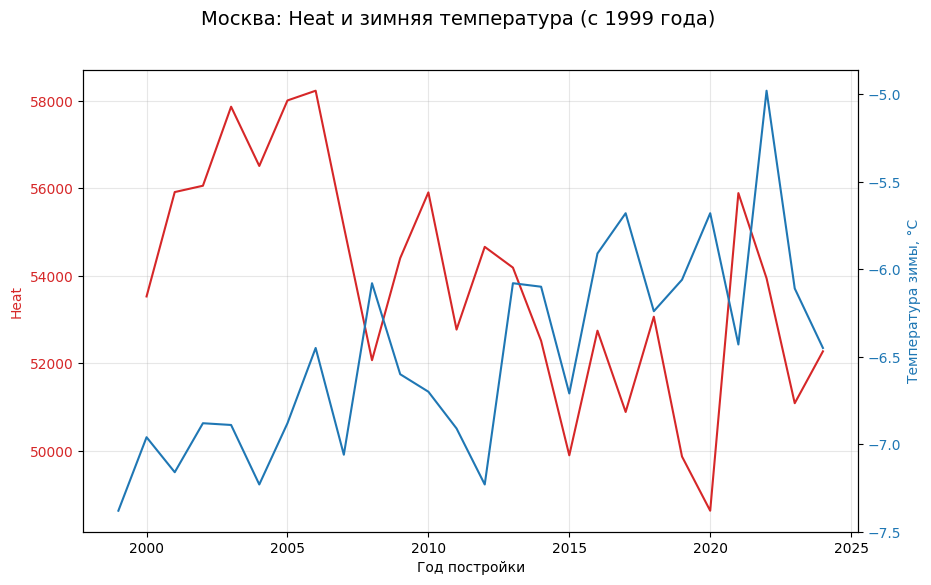

In [35]:
import matplotlib.pyplot as plt

# фильтруем Москву и годы начиная с 1999
df_moscow = df_final[
    (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1999)
]

fig, ax1 = plt.subplots(figsize=(10,6))

# первая ось: heat
ax1.plot(df_moscow["built_year"], df_moscow["heat"], color="tab:red", label="Heat")
ax1.set_xlabel("Год постройки")
ax1.set_ylabel("Heat", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# вторая ось: температура
ax2 = ax1.twinx()
ax2.plot(df_moscow["built_year"], df_moscow["climate_winter"], color="tab:blue", label="Температура (зима)")
ax2.set_ylabel("Температура зимы, °C", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# заголовок
fig.suptitle("Москва: Heat и зимняя температура (с 1999 года)", fontsize=14)

ax1.grid(alpha=0.3)
plt.show()


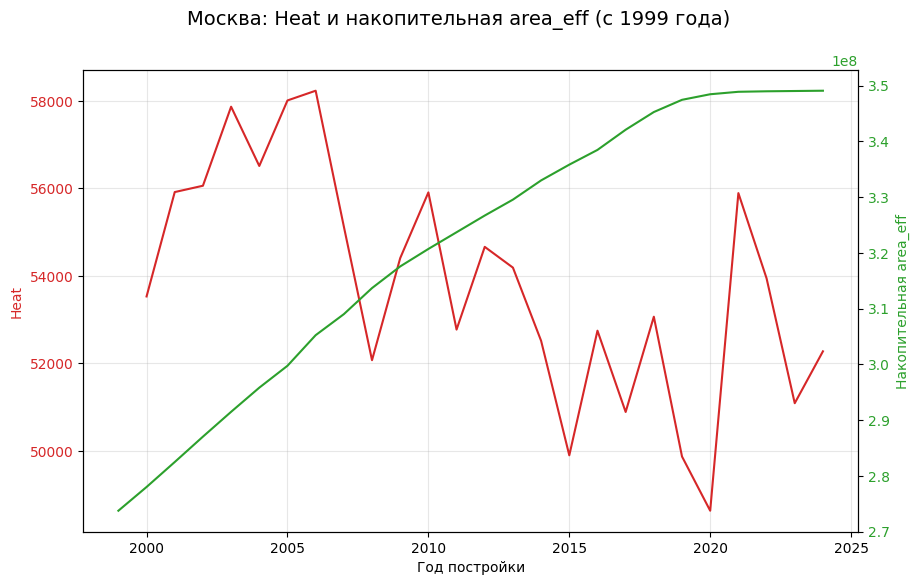

In [36]:
import matplotlib.pyplot as plt

# фильтруем Москву с 1999 года
df_moscow = df_final[
    (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1999)
]

fig, ax1 = plt.subplots(figsize=(10,6))

# первая ось: heat
ax1.plot(df_moscow["built_year"], df_moscow["heat"], color="tab:red", label="Heat")
ax1.set_xlabel("Год постройки")
ax1.set_ylabel("Heat", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# вторая ось: area_eff_cumsum
ax2 = ax1.twinx()
ax2.plot(df_moscow["built_year"], df_moscow["area_eff_cumsum"], color="tab:green", label="Area_eff_cumsum")
ax2.set_ylabel("Накопительная area_eff", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

# заголовок
fig.suptitle("Москва: Heat и накопительная area_eff (с 1999 года)", fontsize=14)

ax1.grid(alpha=0.3)
plt.show()


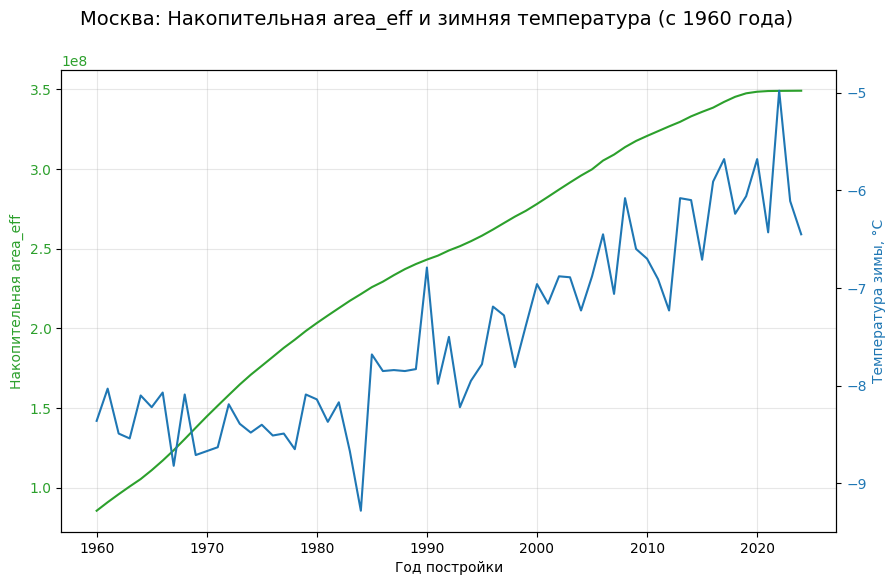

In [37]:
import matplotlib.pyplot as plt

# фильтруем Москву с 1999 года
df_moscow = df_final[
    (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1960)
]

fig, ax1 = plt.subplots(figsize=(10,6))

# первая ось: area_eff_cumsum
ax1.plot(df_moscow["built_year"], df_moscow["area_eff_cumsum"],
         color="tab:green", label="Area_eff_cumsum")
ax1.set_xlabel("Год постройки")
ax1.set_ylabel("Накопительная area_eff", color="tab:green")
ax1.tick_params(axis="y", labelcolor="tab:green")

# вторая ось: климат
ax2 = ax1.twinx()
ax2.plot(df_moscow["built_year"], df_moscow["climate_winter"],
         color="tab:blue", label="Температура (зима)")
ax2.set_ylabel("Температура зимы, °C", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# заголовок
fig.suptitle("Москва: Накопительная area_eff и зимняя температура (с 1960 года)", fontsize=14)

ax1.grid(alpha=0.3)
plt.show()


In [38]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Белгородская,0,0.000,0.000000e+00,NaN,NaN
1,Белгородская,1,0.000,0.000000e+00,NaN,NaN
2,Белгородская,2,0.000,0.000000e+00,NaN,NaN
3,Белгородская,3,0.000,0.000000e+00,NaN,NaN
4,Белгородская,4,0.000,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
36445,Ярославская,2020,15410.371,2.730186e+07,-5.68,5059.73
36446,Ярославская,2021,15410.371,2.731727e+07,-6.43,5564.62
36447,Ярославская,2022,15410.371,2.733268e+07,-4.98,5474.00
36448,Ярославская,2023,15410.371,2.734809e+07,-6.11,5126.40


In [39]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


      built_year formalname_region  area_eff_cumsum  climate_winter
2000        2000      Белгородская         0.027328        0.120000
2001        2001      Белгородская         0.028260        0.031111
2002        2002      Белгородская         0.029419        0.155556
2003        2003      Белгородская         0.030457        0.151111
2004        2004      Белгородская         0.031718        0.000000


In [40]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
2000,Белгородская,2000,366384.4362,0.027328,0.120000,3272.10
2001,Белгородская,2001,316479.4755,0.028260,0.031111,3326.70
2002,Белгородская,2002,393531.6730,0.029419,0.155556,2679.40
2003,Белгородская,2003,352282.2104,0.030457,0.151111,3632.00
2004,Белгородская,2004,428221.9477,0.031718,0.000000,3464.80
...,...,...,...,...,...,...
36445,Ярославская,2020,15410.3710,0.052414,0.688889,5059.73
36446,Ярославская,2021,15410.3710,0.052460,0.355556,5564.62
36447,Ярославская,2022,15410.3710,0.052505,1.000000,5474.00
36448,Ярославская,2023,15410.3710,0.052550,0.497778,5126.40


Intercept: 124842.98435174652
Coef area_eff_cumsum: 9.511495380254984e-06
Coef climate_winter: -850.1085944715841


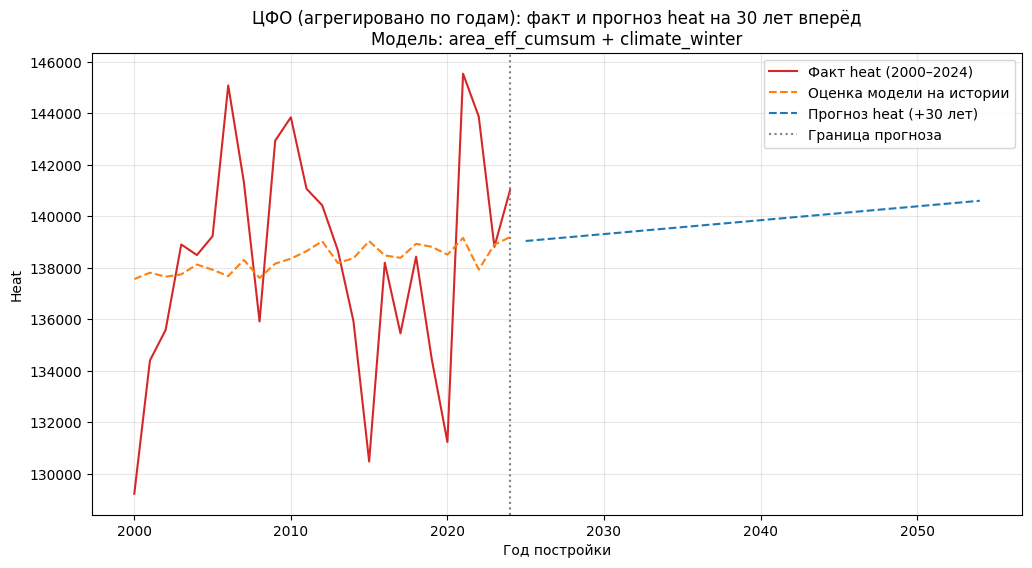

    built_year           heat  area_eff_cumsum  climate_winter      heat_pred  \
15        2015  130466.400000     8.919449e+08       -6.710000  139030.942816   
16        2016  138190.100000     9.048716e+08       -5.910000  138473.808081   
17        2017  135447.800000     9.156943e+08       -5.680000  138381.222868   
18        2018  138428.600000     9.228314e+08       -6.240000  138925.168179   
19        2019  134438.070000     9.268878e+08       -6.060000  138810.731334   
20        2020  131223.580000     9.288287e+08       -5.680000  138506.151280   
21        2021  145536.110000     9.301338e+08       -6.430000  139156.145896   
22        2022  143871.100000     9.306952e+08       -4.980000  137928.827870   
23        2023  138807.600000     9.312182e+08       -6.110000  138894.425338   
24        2024  141013.500000     9.317412e+08       -6.450000  139188.437016   
25        2025  139035.904241     9.770618e+08       -5.763500            NaN   
26        2026  139089.79607

In [41]:
#ЦФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) фильтр по годам и агрегация
# df_moscow = df_final[
#     (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1999)
# ]

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ЦФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 124842.98435174652
Coef area_eff_cumsum: 9.511495380254984e-06
Coef climate_winter: -850.1085944715841
R2 базовой модели: 0.014114059574790283


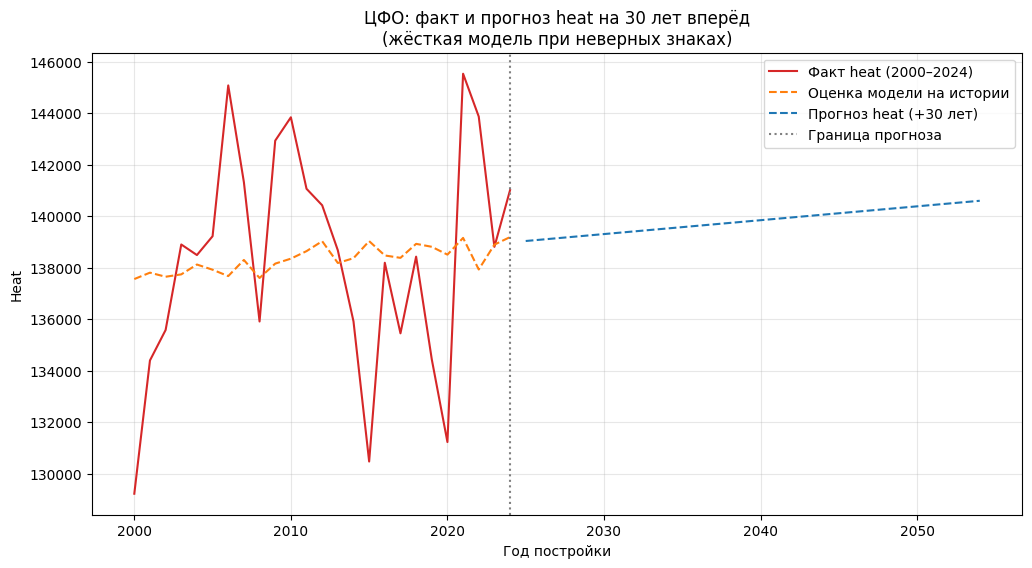

    built_year           heat      heat_pred     type
15        2015  130466.400000  139030.942816     Факт
16        2016  138190.100000  138473.808081     Факт
17        2017  135447.800000  138381.222868     Факт
18        2018  138428.600000  138925.168179     Факт
19        2019  134438.070000  138810.731334     Факт
20        2020  131223.580000  138506.151280     Факт
21        2021  145536.110000  139156.145896     Факт
22        2022  143871.100000  137928.827870     Факт
23        2023  138807.600000  138894.425338     Факт
24        2024  141013.500000  139188.437016     Факт
25        2025  139035.904241            NaN  Прогноз
26        2026  139089.796075            NaN  Прогноз
27        2027  139143.687909            NaN  Прогноз
28        2028  139197.579743            NaN  Прогноз
29        2029  139251.471577            NaN  Прогноз
30        2030  139305.363411            NaN  Прогноз
31        2031  139359.255245            NaN  Прогноз
32        2032  139413.14707

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ЦФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


    built_year       heat  area_eff_cumsum  climate_winter
0         2000  129215.40     7.146843e+08           -6.96
1         2001  134394.40     7.228637e+08           -7.16
2         2002  135577.70     7.312250e+08           -6.88
3         2003  138900.40     7.400883e+08           -6.89
4         2004  138489.90     7.498921e+08           -7.23
5         2005  139221.90     7.598760e+08           -6.88
6         2006  145081.20     7.723889e+08           -6.45
7         2007  141319.20     7.837122e+08           -7.06
8         2008  135907.80     7.977021e+08           -6.08
9         2009  142934.90     8.098663e+08           -6.60
10        2010  143843.30     8.212167e+08           -6.70
11        2011  141065.00     8.331605e+08           -6.91
12        2012  140423.50     8.451781e+08           -7.23
13        2013  138673.40     8.589949e+08           -6.08
14        2014  135911.90     8.767083e+08           -6.10
15        2015  130466.40     8.919449e+08           -6.

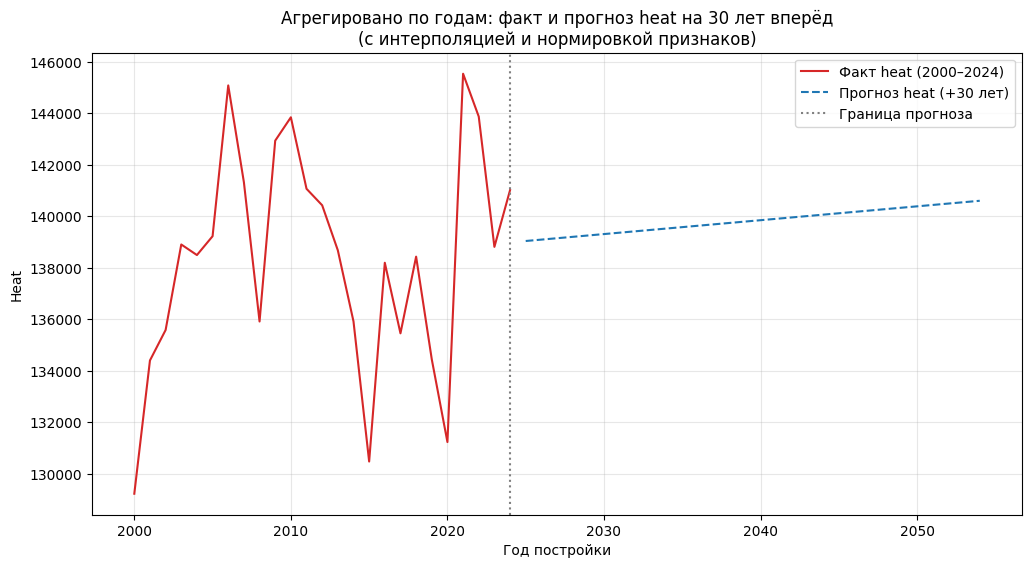

In [43]:
#ЦФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)
print(df_yearly)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
#df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.0141
Базовые коэффициенты: [ 727.69391091 -469.5104745 ] Intercept: 138335.3104
R2 жёсткой модели: 0.0141
Финальные коэффициенты с фиксированными знаками: [ 727.69391086 -469.51047455] Intercept: 138335.3104

--- Метрики: Базовая модель ---
n=25, k=2
R²: 0.0141, Adjusted R²: -0.0755119350093183
RMSE: 4272.91 (в тех же единицах, что и heat)
MAE:  3359.12
MAPE: 2.44% (учтено 100.0% ненулевых наблюдений)
AIC: 424.00251716787375, BIC: 427.65914464247834

--- Кросс-валидация (Базовая модель) ---
CV RMSE (среднее): 5202.41
CV MAE  (среднее): 4055.17
CV R²   (среднее): -0.7690

--- Метрики: Жёсткая модель (фикс. знаки) ---
n=25, k=2
R²: 0.0141, Adjusted R²: -0.07551193500931785
RMSE: 4272.91 (в тех же единицах, что и heat)
MAE:  3359.12
MAPE: 2.44% (учтено 100.0% ненулевых наблюдений)
AIC: 424.00251716787375, BIC: 427.65914464247834

Коэффициенты базовой модели: [ 727.69391091 -469.5104745 ] Intercept: 138335.3104
Коэффициенты с фиксированными знаками: [ 727.69391086 -469

C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


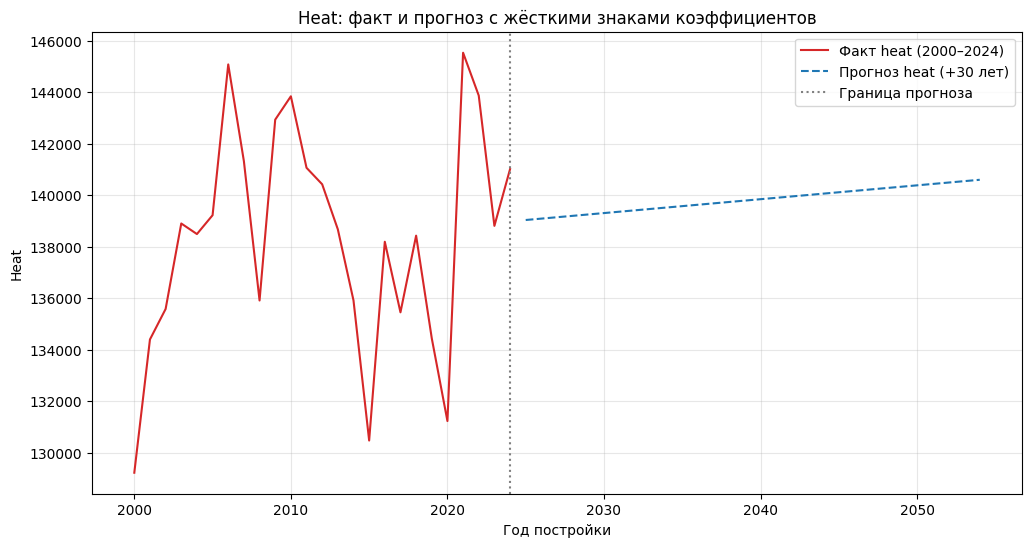

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

def adjusted_r2(r2, n, k):
    """Скорректированный R2. Возвращает np.nan, если нельзя посчитать."""
    if n <= k + 1:
        return np.nan
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def safe_mape(y_true, y_pred):
    """MAPE с защитой от нулевых y: считаем только для ненулевых наблюдений."""
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan, 0.0  # нет ненулевых значений
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    pct_zeros = 1.0 - mask.sum() / len(y_true)
    return mape, pct_zeros

def compute_regression_metrics(y_true, y_pred, X, model_name="Model"):
    n = len(y_true)
    k = X.shape[1]  # число признаков (без интерсепта)
    r2 = r2_score(y_true, y_pred)
    adj = adjusted_r2(r2, n, k)
    mse = mean_squared_error(y_true, y_pred)         # MSE
    rmse = np.sqrt(mse)                              # RMSE
    mae = mean_absolute_error(y_true, y_pred)
    mape, pct_zeros = safe_mape(y_true, y_pred)
    rss = np.sum((y_true - y_pred) ** 2)
    p = k + 1  # число параметров (включая intercept)
    # AIC / BIC (предположение о нормальности остатков)
    # формула: AIC = n * ln(RSS/n) + 2*p
    # BIC = n * ln(RSS/n) + ln(n) * p
    if rss <= 0:
        aic = np.nan
        bic = np.nan
    else:
        aic = n * np.log(rss / n) + 2 * p
        bic = n * np.log(rss / n) + np.log(n) * p

    out = {
        "model": model_name,
        "n": n, "k": k,
        "R2": r2, "Adjusted_R2": adj,
        "RMSE": rmse, "MAE": mae, "MAPE": mape, "Pct_zeros_in_y": pct_zeros,
        "RSS": rss, "AIC": aic, "BIC": bic
    }
    return out

def print_metrics(m):
    print(f"\n--- Метрики: {m['model']} ---")
    print(f"n={m['n']}, k={m['k']}")
    print(f"R²: {m['R2']:.4f}, Adjusted R²: {m['Adjusted_R2'] if not np.isnan(m['Adjusted_R2']) else 'NA'}")
    print(f"RMSE: {m['RMSE']:.2f} (в тех же единицах, что и heat)")
    print(f"MAE:  {m['MAE']:.2f}")
    if np.isnan(m['MAPE']):
        print("MAPE: NA (все значения y равны нулю или недостаточно ненулевых наблюдений)")
    else:
        print(f"MAPE: {m['MAPE']:.2f}% (учтено {100*(1-m['Pct_zeros_in_y']):.1f}% ненулевых наблюдений)")
    print(f"AIC: {m['AIC'] if not np.isnan(m['AIC']) else 'NA'}, BIC: {m['BIC'] if not np.isnan(m['BIC']) else 'NA'}")

# === Базовая модель (как у вас) ===
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
metrics_base = compute_regression_metrics(y, y_pred_base, X_scaled, model_name="Базовая модель")
print_metrics(metrics_base)

# --- Опционально: кросс-валидация (только для базовой модели sklearn) ---
n = len(y)
n_splits = min(5, n) if n >= 2 else 0
if n_splits >= 2:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    # отрицательные значения — потому что cross_val_score для MSE/MAE возвращает отрицательные
    cv_mse = -cross_val_score(LinearRegression(), X_scaled, y, scoring='neg_mean_squared_error', cv=kf)
    cv_rmse = np.sqrt(cv_mse).mean()
    cv_mae = -cross_val_score(LinearRegression(), X_scaled, y, scoring='neg_mean_absolute_error', cv=kf).mean()
    cv_r2 = cross_val_score(LinearRegression(), X_scaled, y, scoring='r2', cv=kf).mean()
    print("\n--- Кросс-валидация (Базовая модель) ---")
    print(f"CV RMSE (среднее): {cv_rmse:.2f}")
    print(f"CV MAE  (среднее): {cv_mae:.2f}")
    print(f"CV R²   (среднее): {cv_r2:.4f}")
else:
    print("\nНедостаточно наблюдений для кросс-валидации (n < 2)")

# === Жёсткая фиксация знаков (как у вас) ===
def mse_beta(beta, X, y):
    return np.mean((y - X @ beta) ** 2)

bounds = [(0, None), (None, 0)]
# начальное приближение — текущие коэффициенты (если они имеют подходящую длину)
x0 = reg.coef_.copy()
if x0.shape[0] != X_scaled.shape[1]:
    x0 = np.zeros(X_scaled.shape[1])

res = minimize(mse_beta, x0, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)

metrics_fixed = compute_regression_metrics(y, y_pred_fixed, X_scaled, model_name="Жёсткая модель (фикс. знаки)")
print_metrics(metrics_fixed)

# --- Печать коэффициентов ---
print("\nКоэффициенты базовой модели:", reg.coef_, "Intercept:", reg.intercept_)
print("Коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


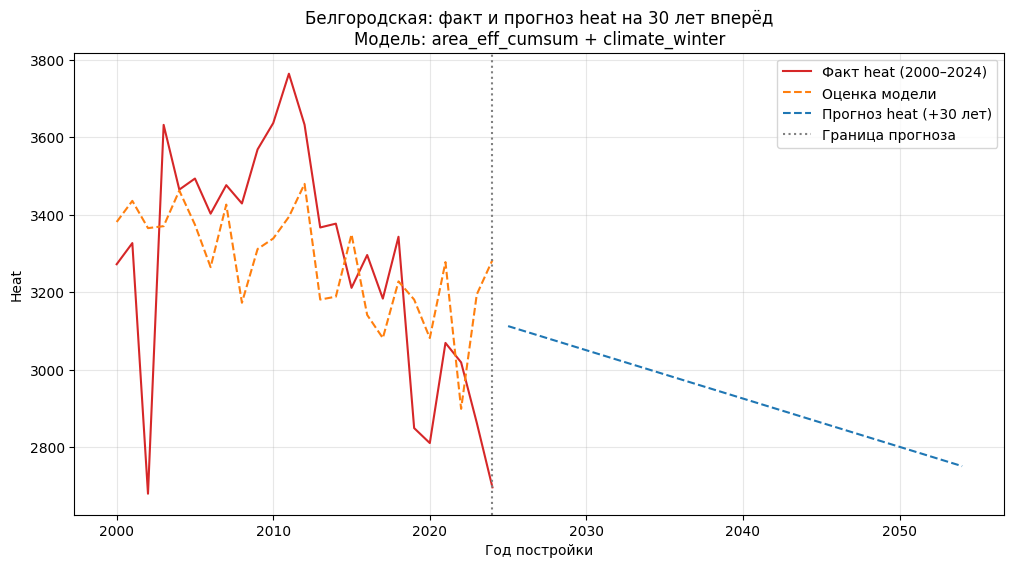

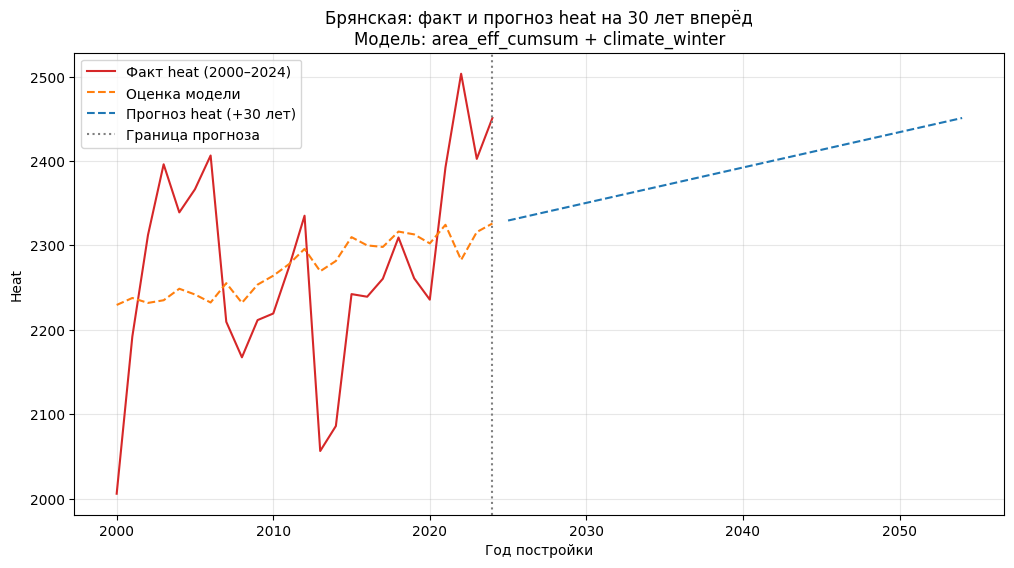

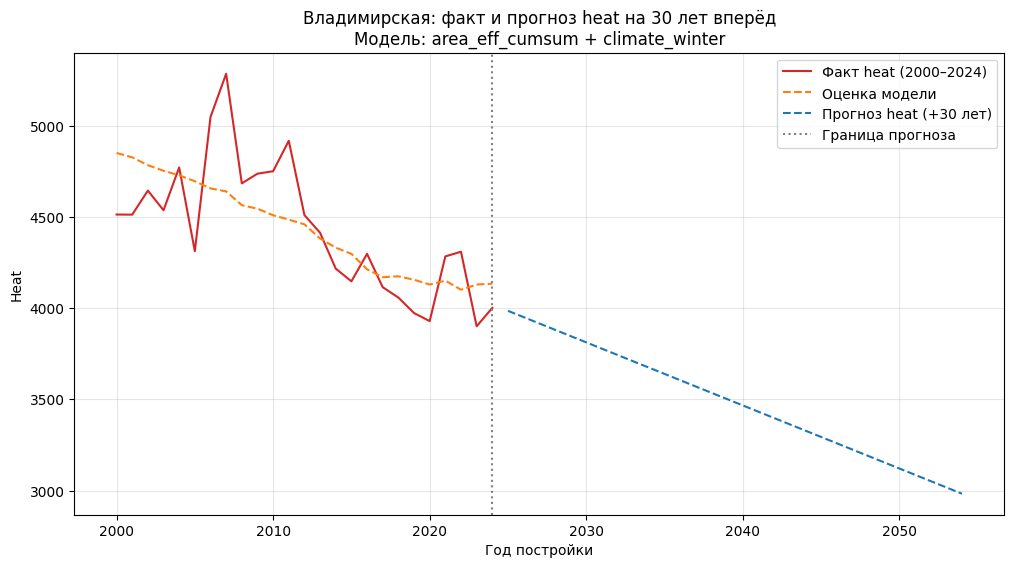

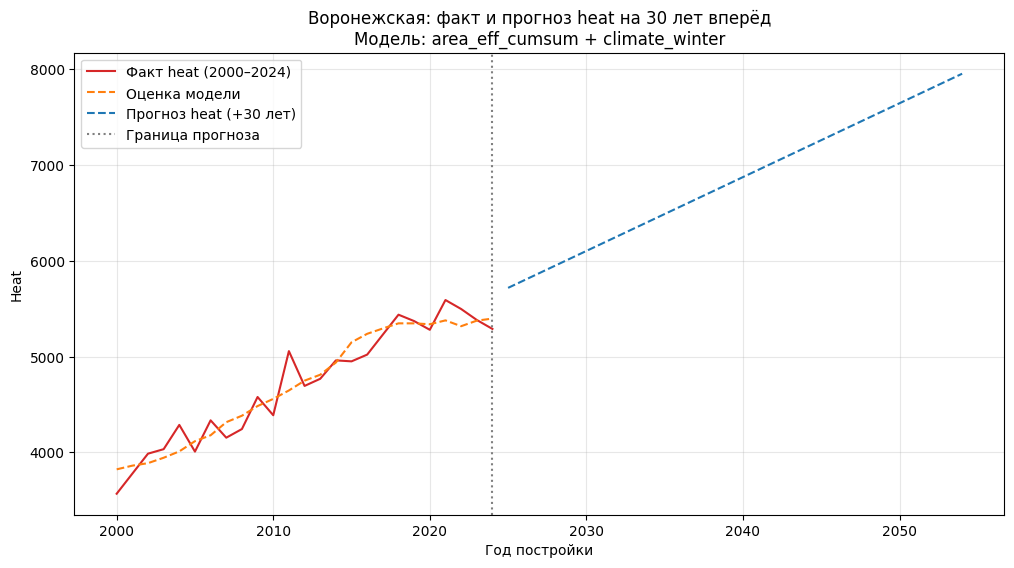

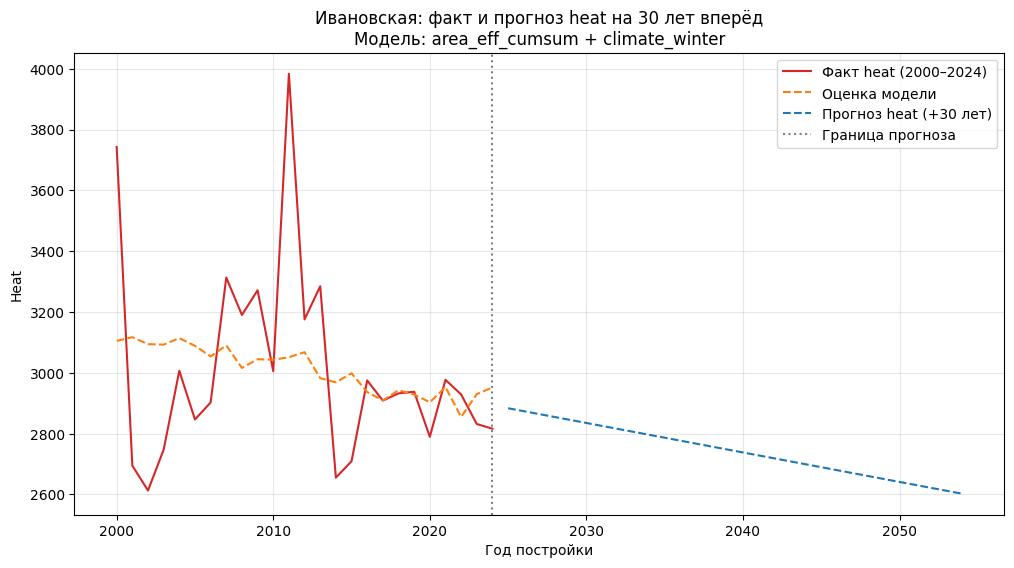

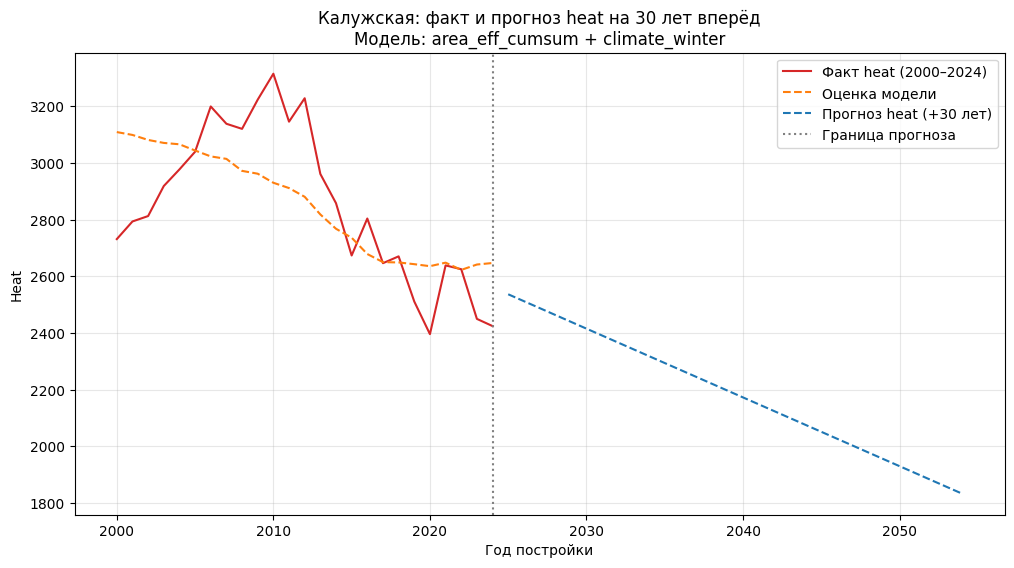

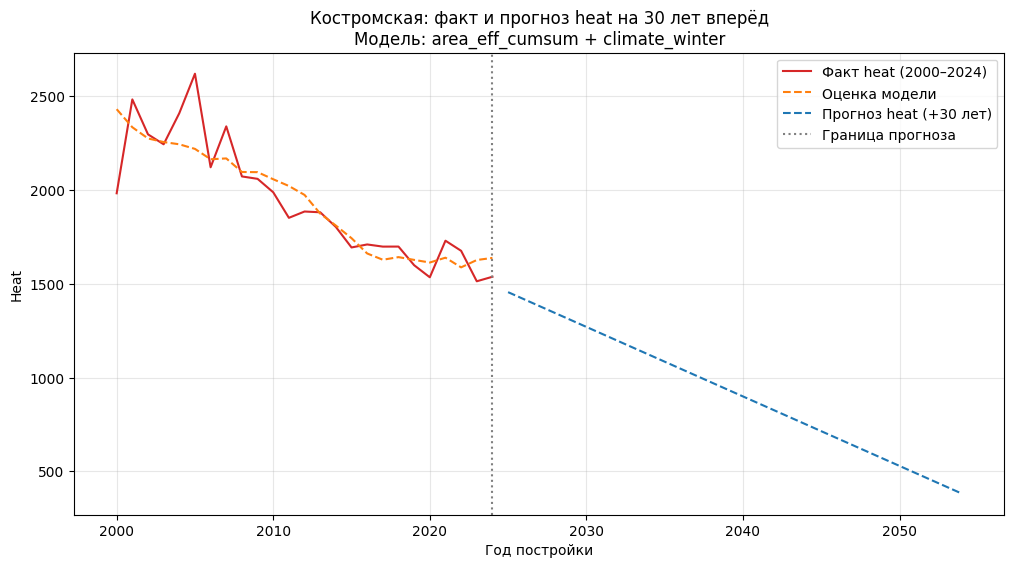

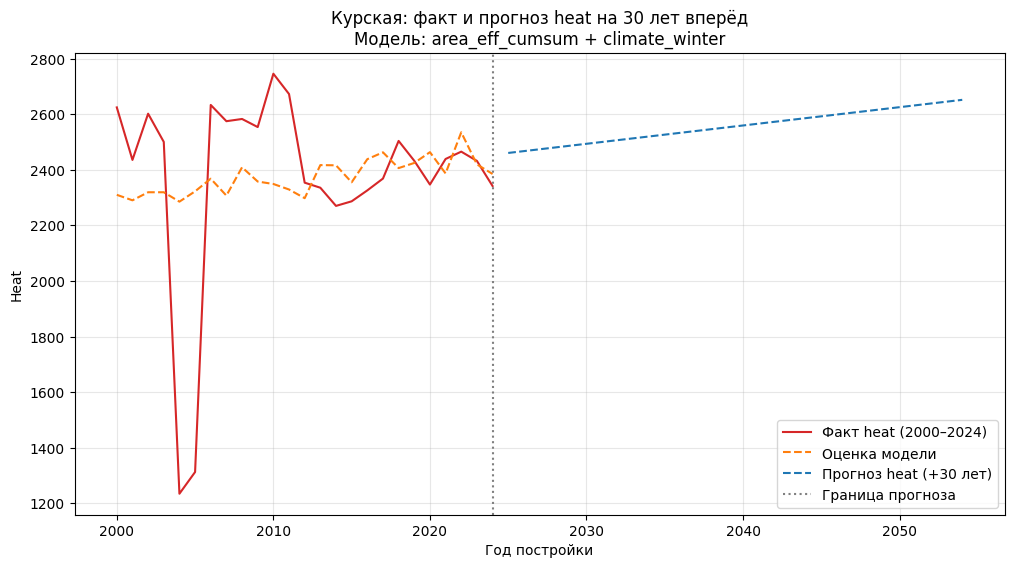

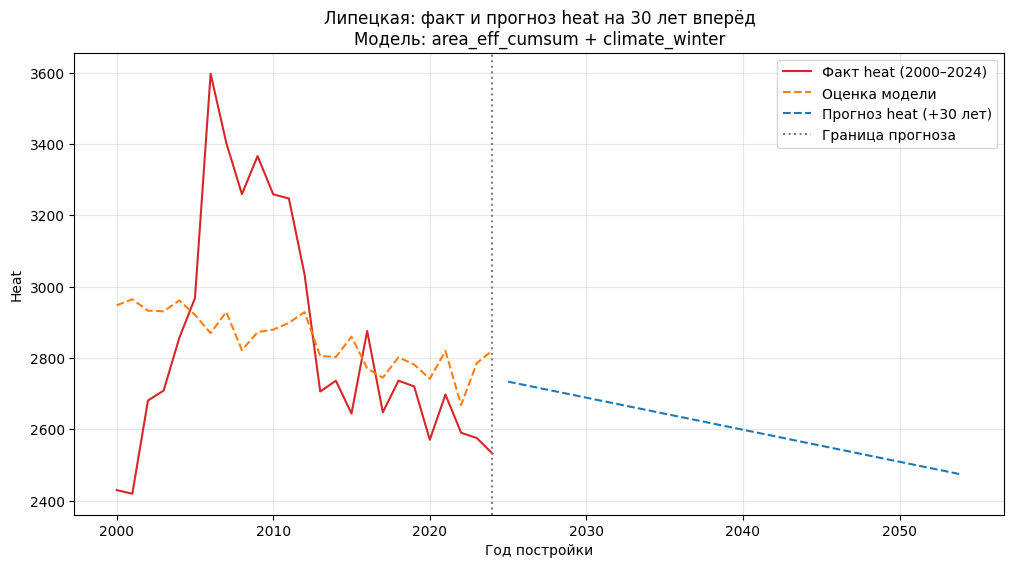

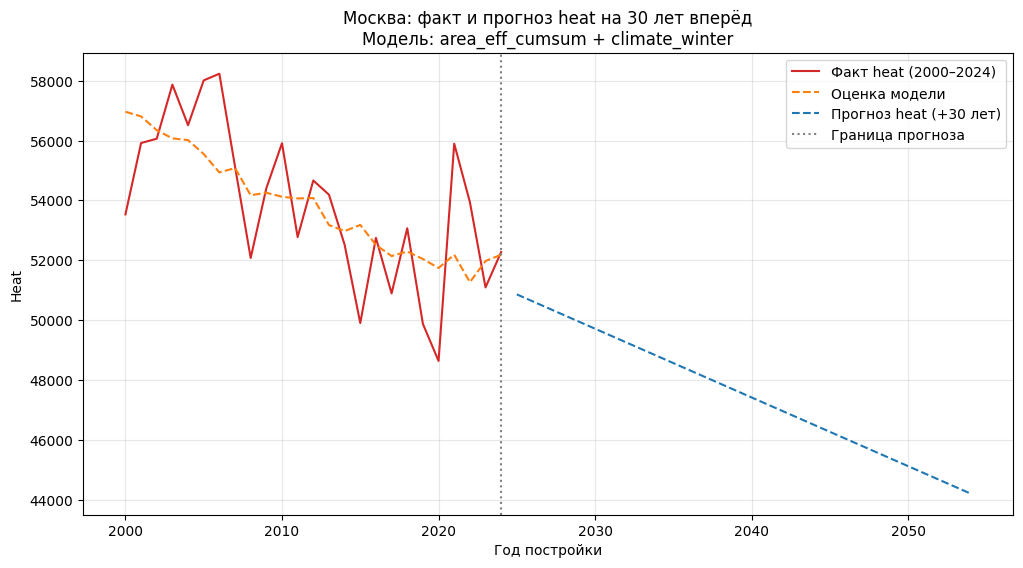

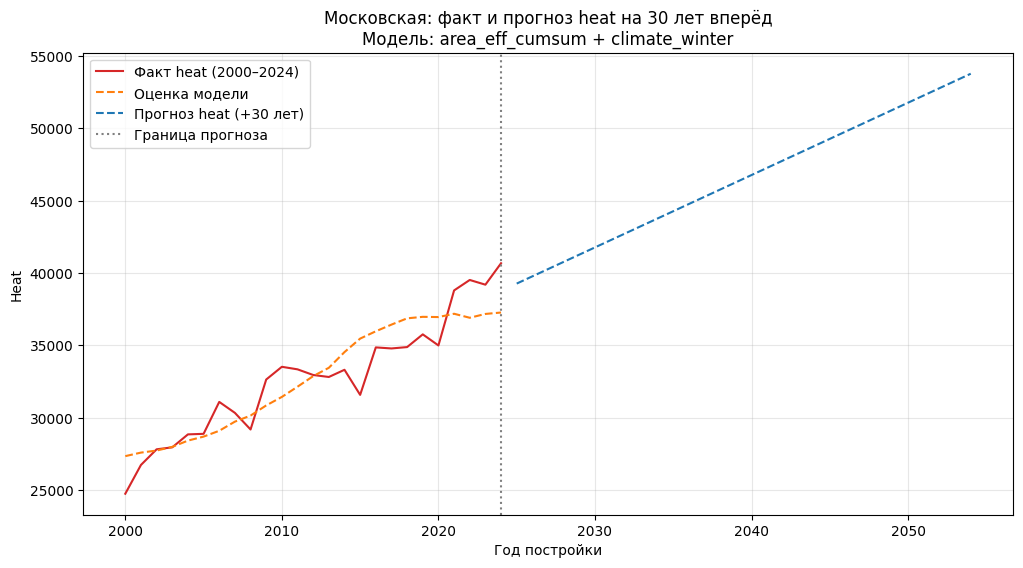

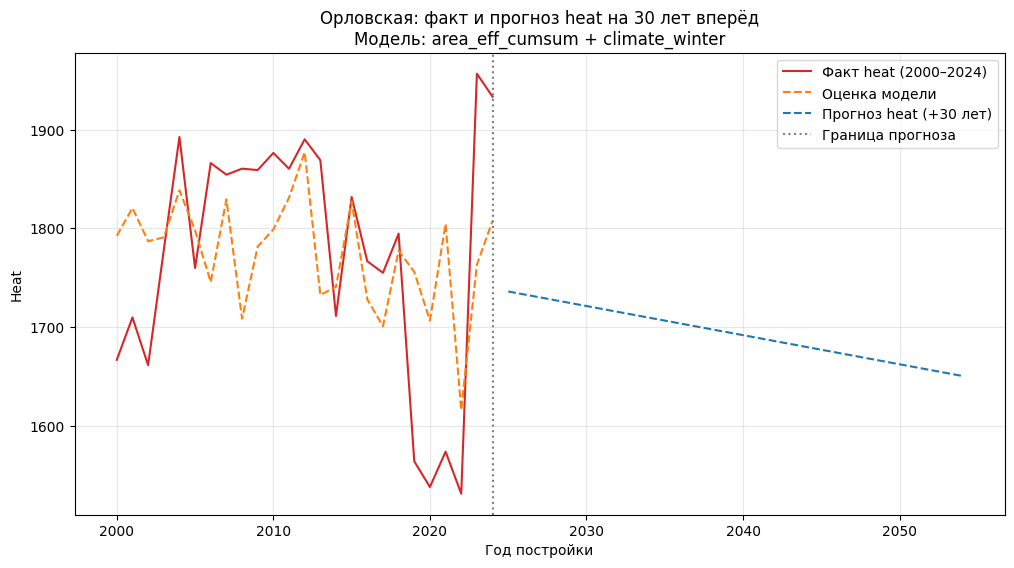

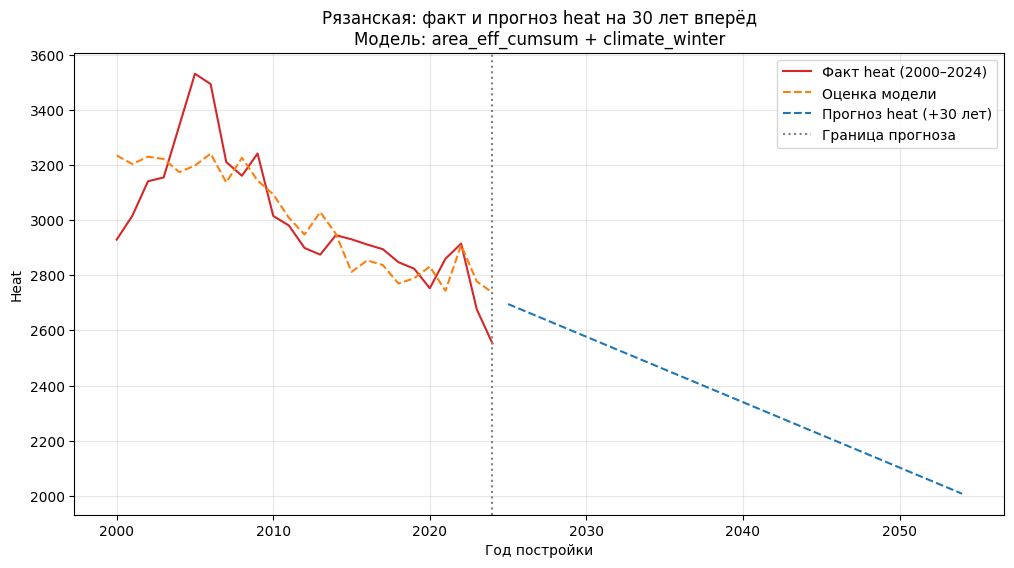

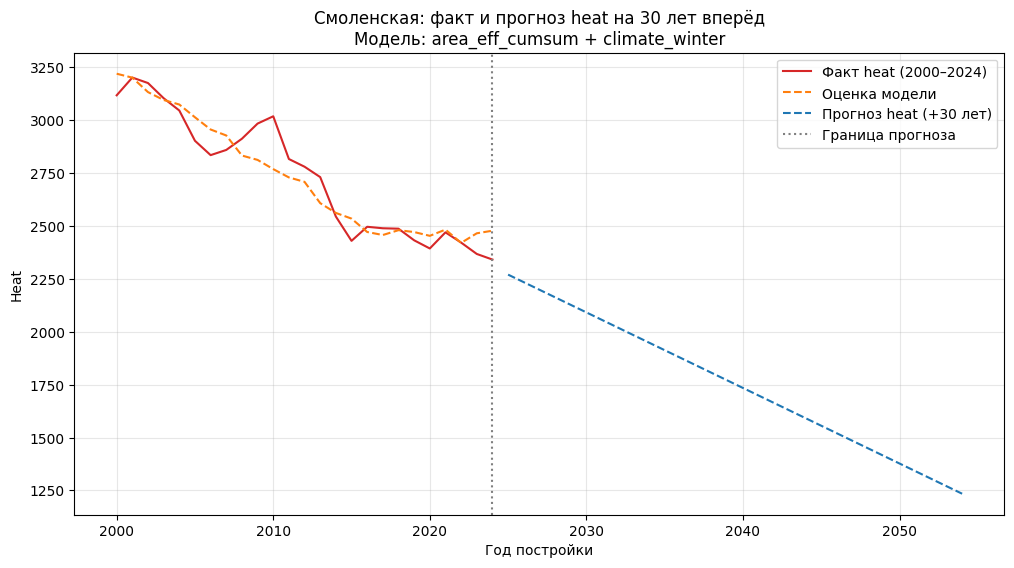

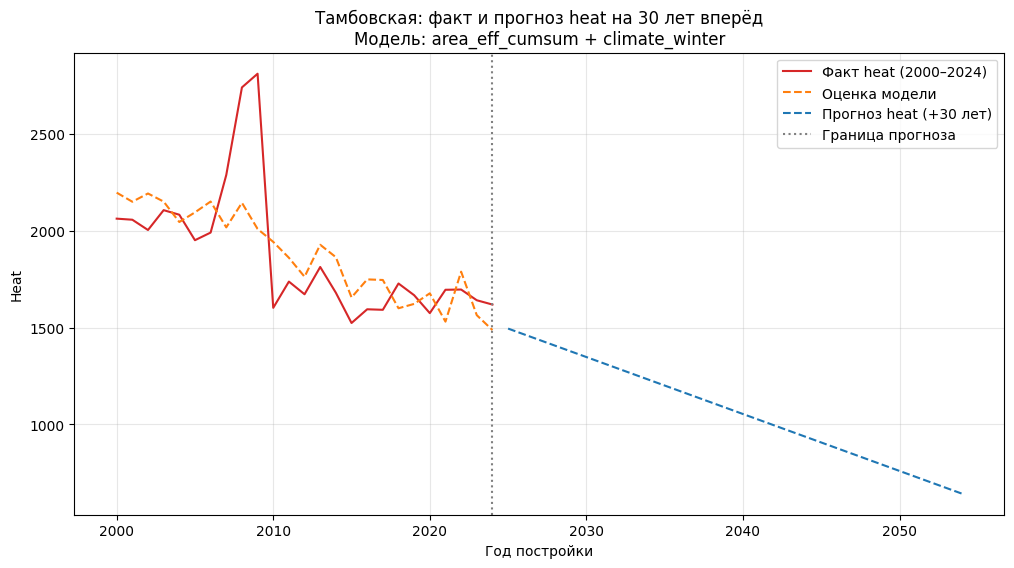

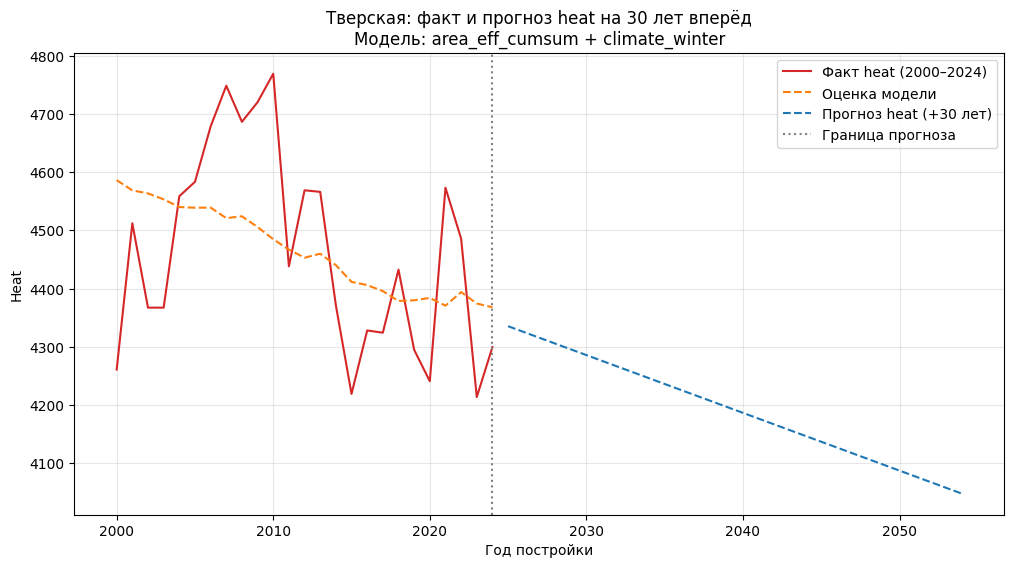

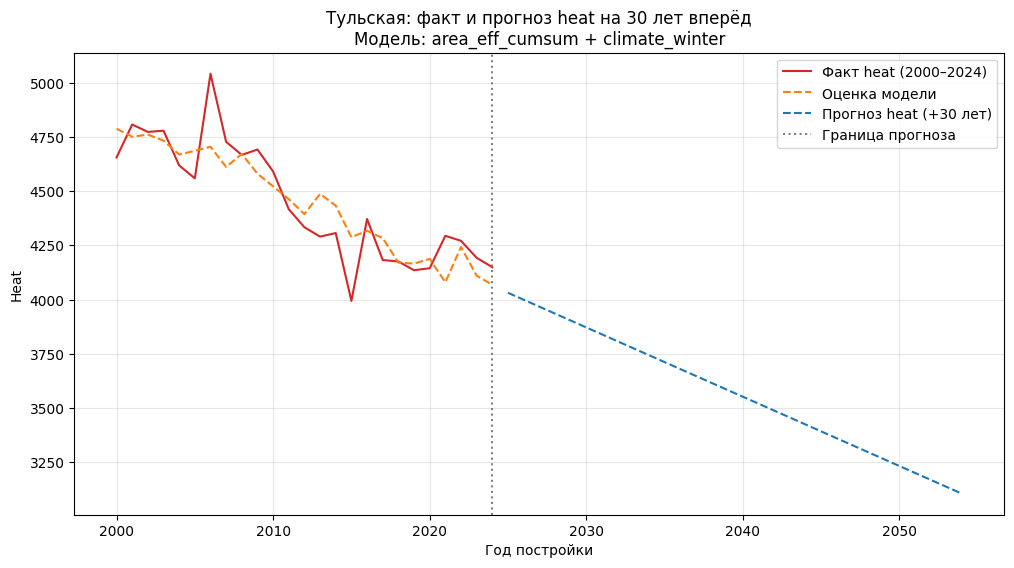

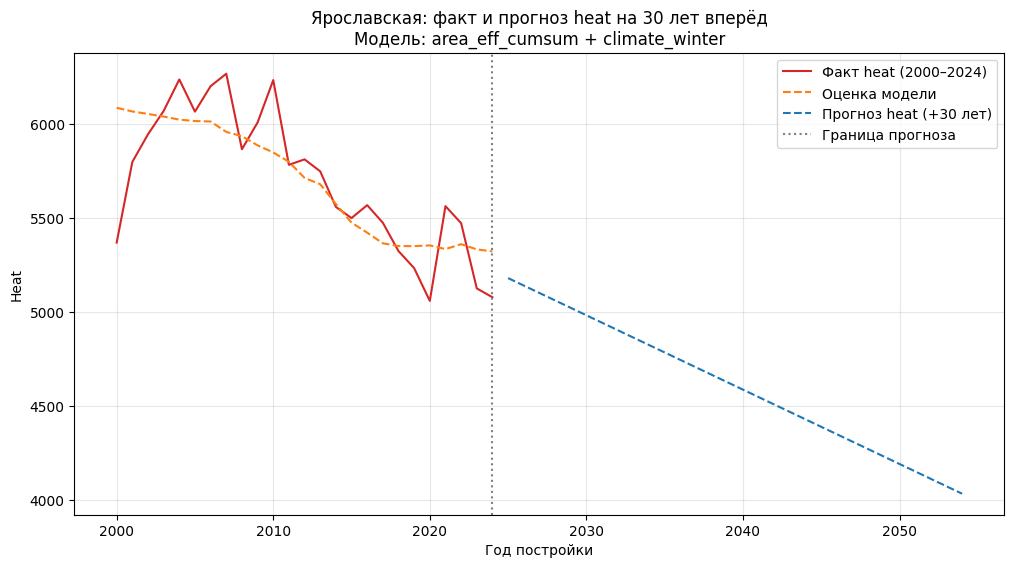

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0   Белгородская   1429.373053              0.000007          -261.371115   
1       Брянская   1588.088412              0.000029           -28.930507   
2   Владимирская   9570.521345             -0.000190           -30.247190   
3    Воронежская   -147.663751              0.000126           -46.013923   
4     Ивановская   3874.952143             -0.000066           -67.051333   
5      Калужская   5315.914791             -0.000128           -17.265321   
6    Костромская   7970.162299             -0.000609           -35.142346   
7        Курская   2960.100710              0.000005           102.117979   
8       Липецкая   2498.766050             -0.000018          -104.372954   
9         Москва  70027.449566             -0.000063          -628.524353   
10    Московская   8703.922028              0.000119          -209.355041   
11     Орловская    609.583868              0.000022          -130.095637   

In [45]:
#ЦФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


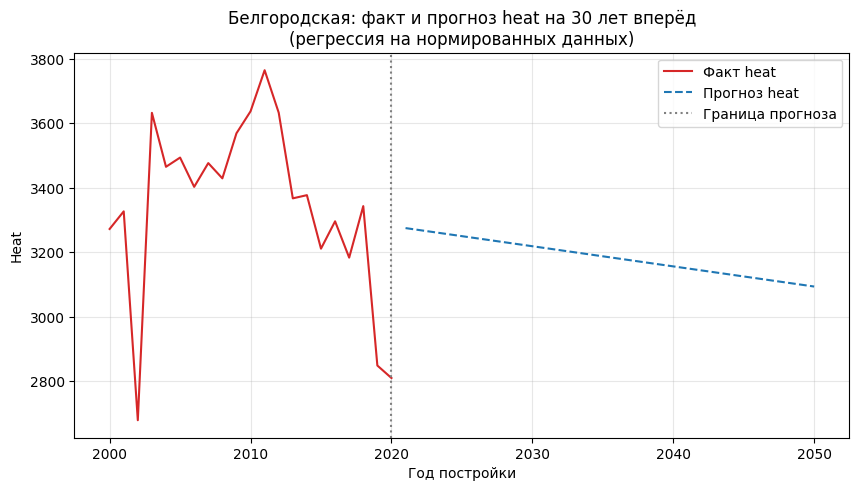

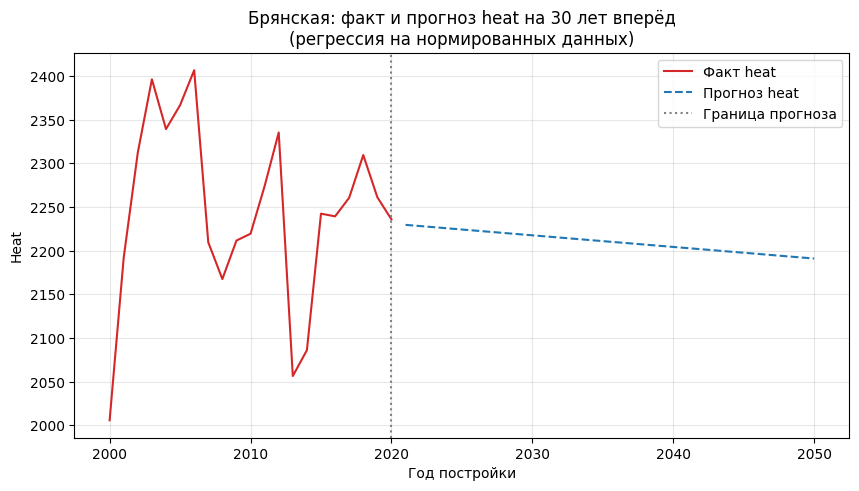

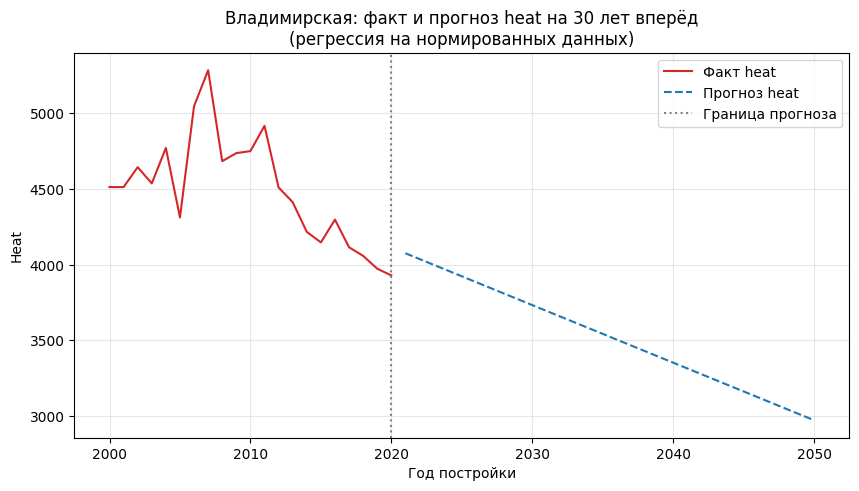

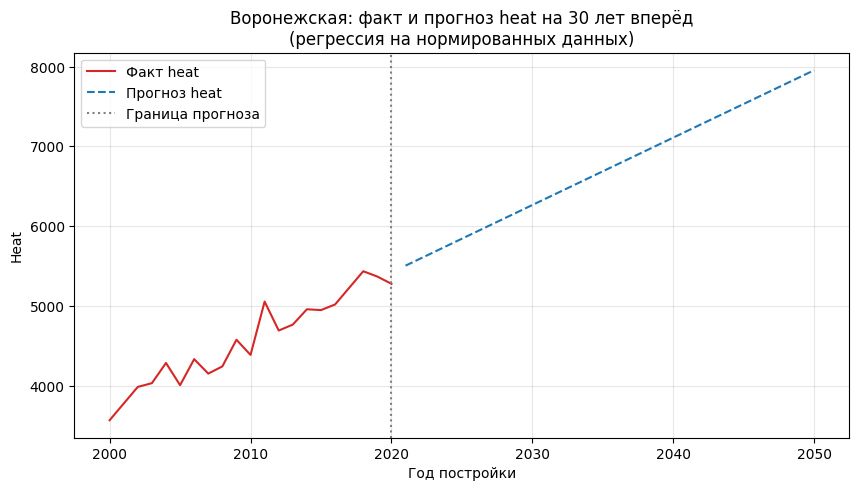

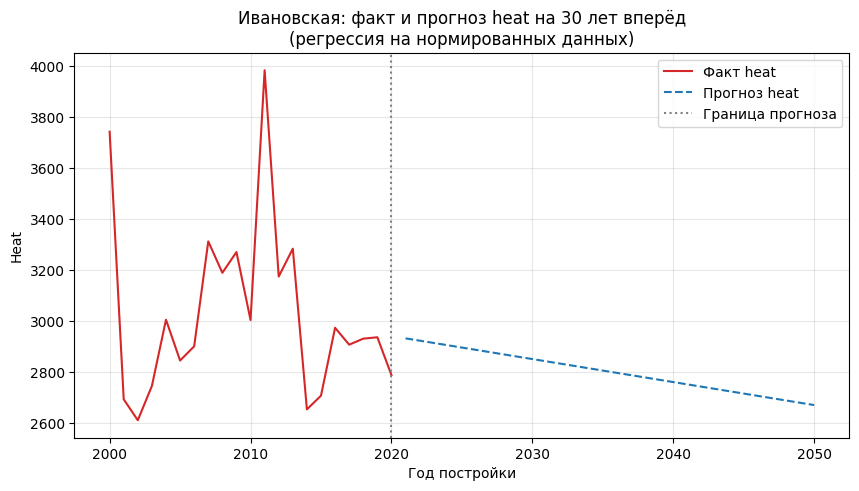

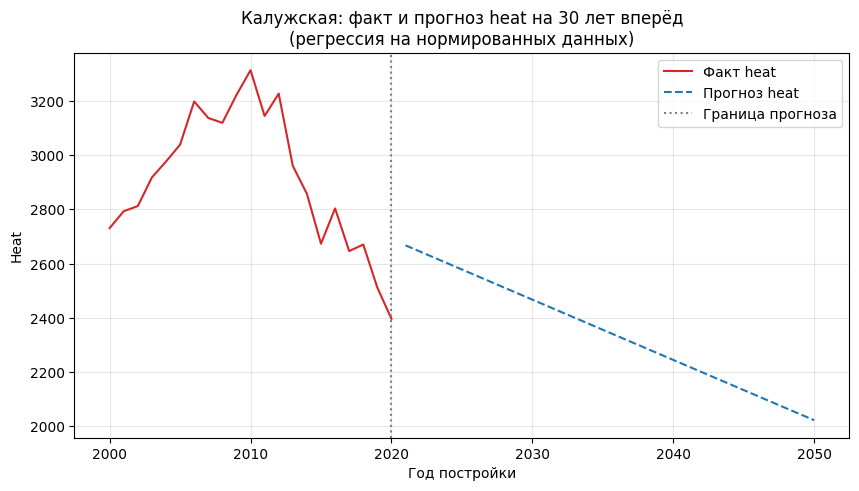

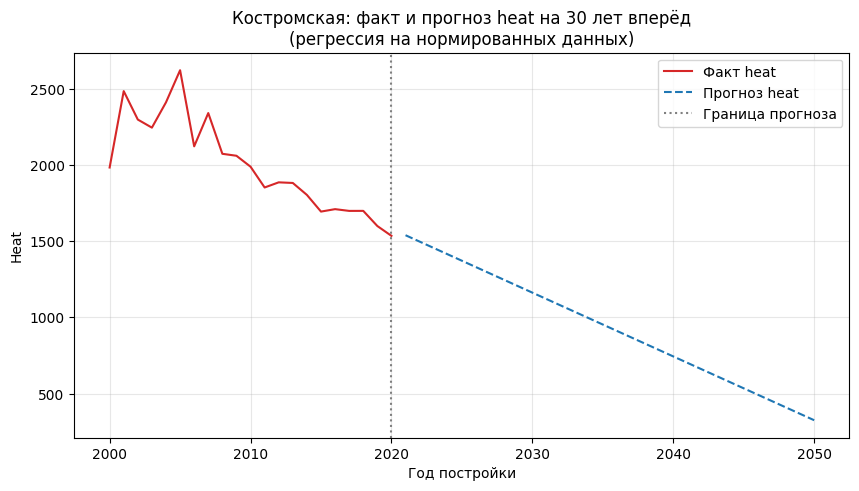

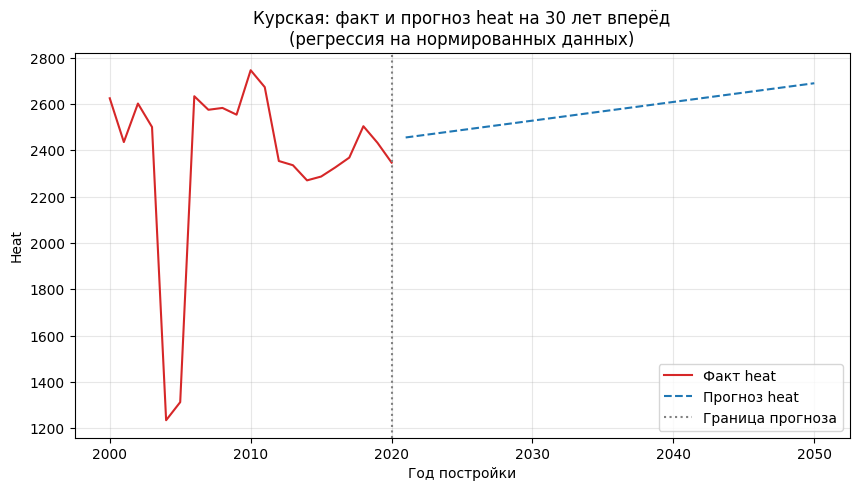

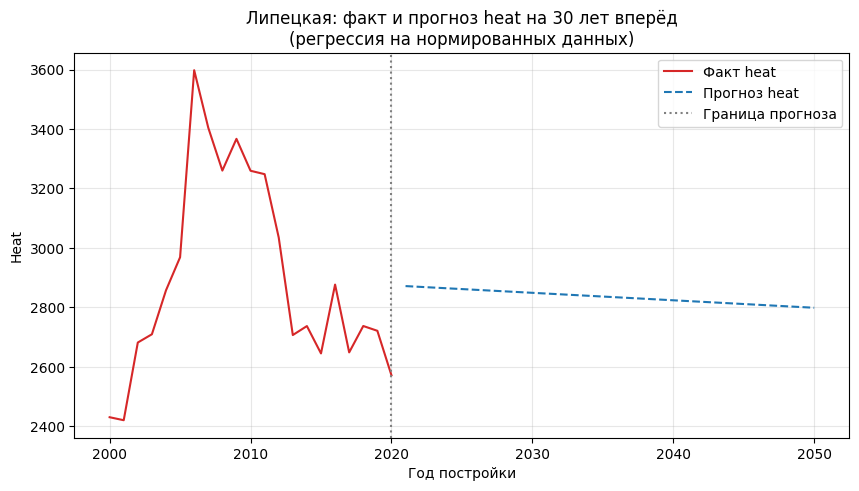

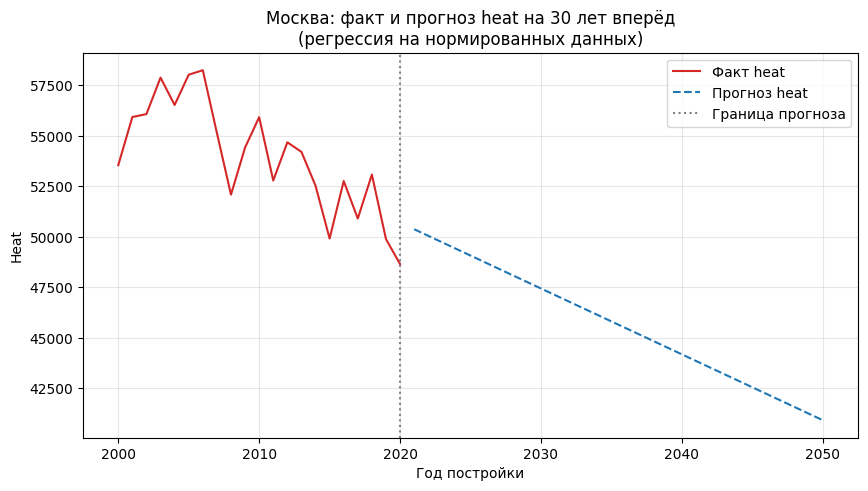

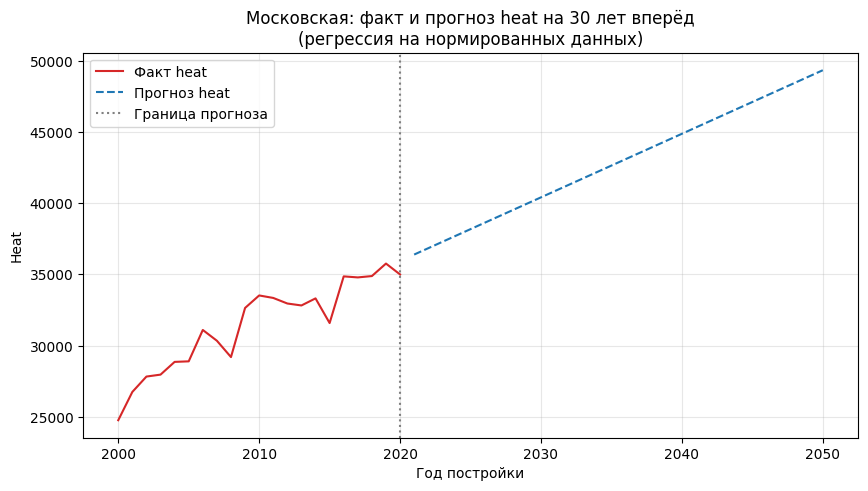

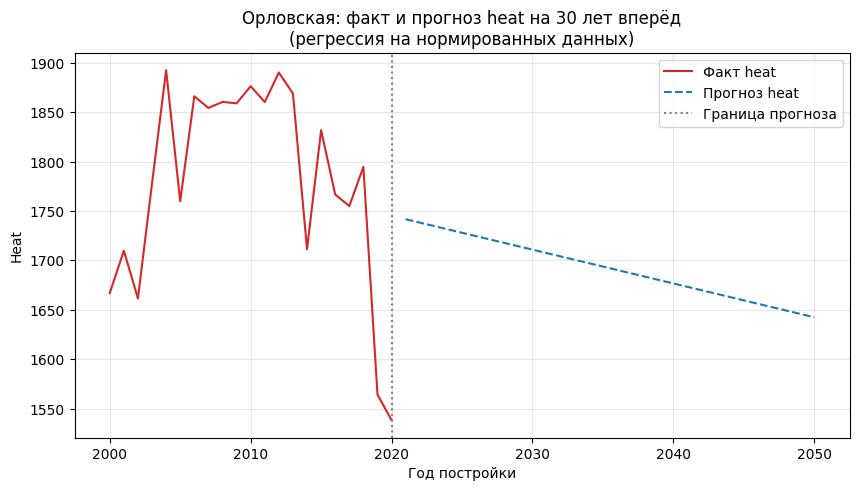

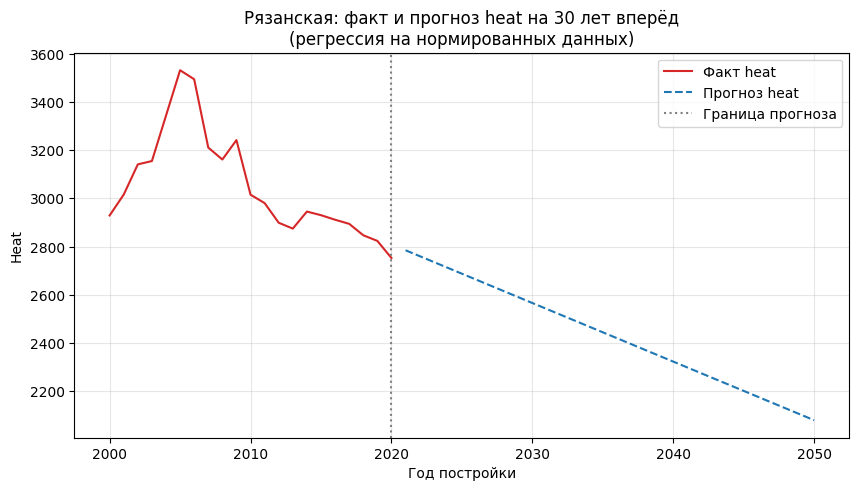

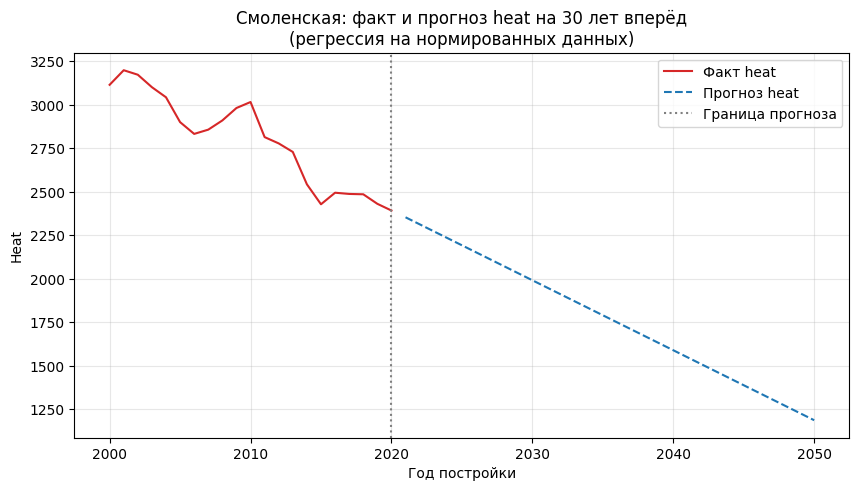

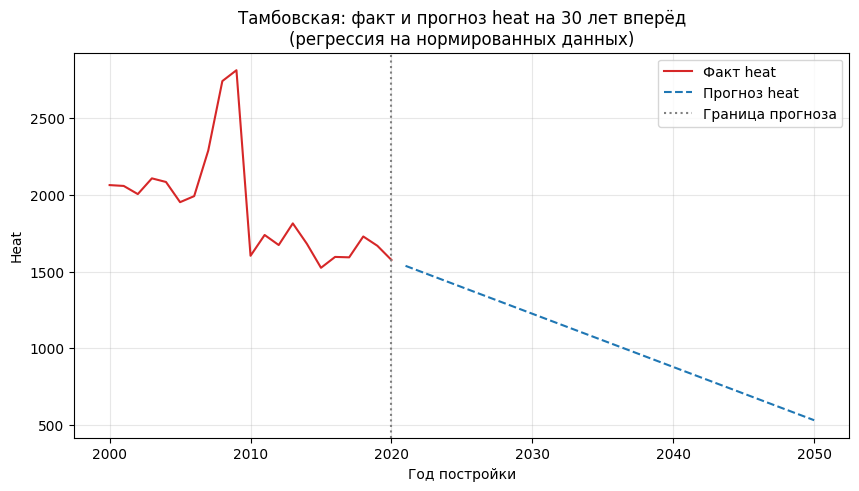

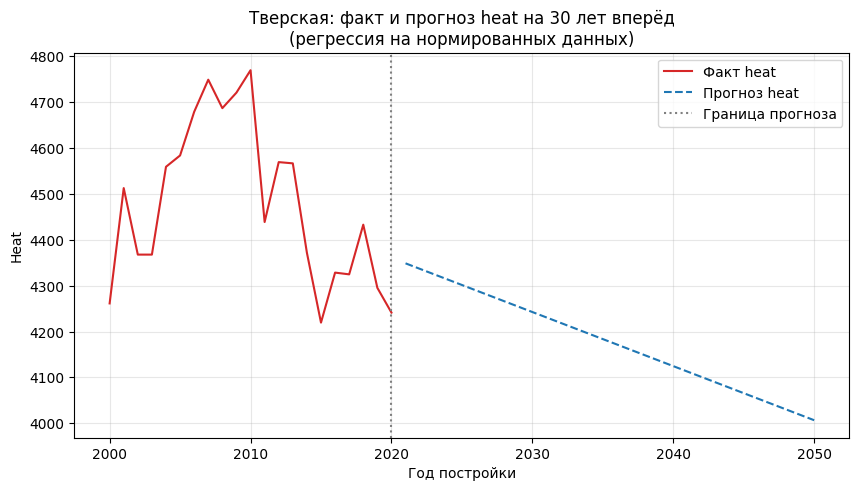

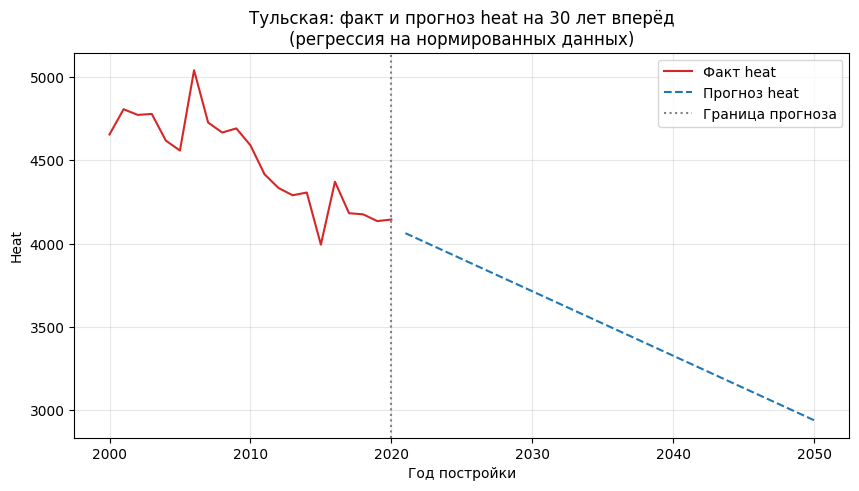

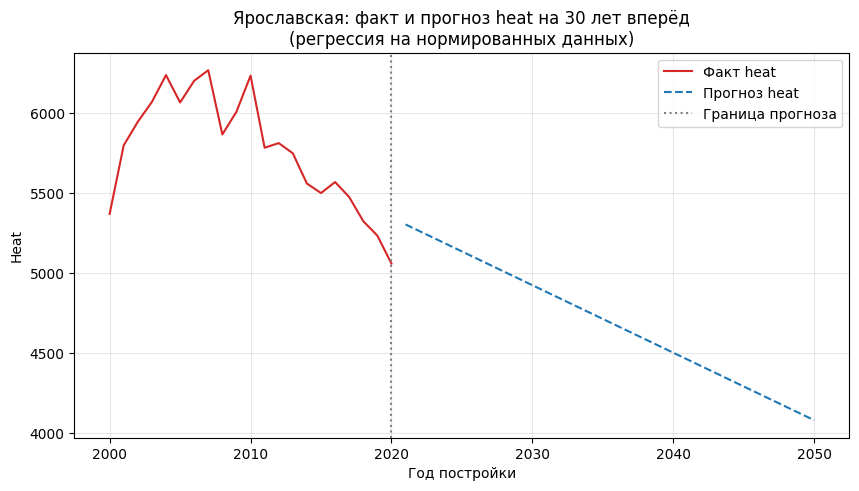

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0   Белгородская   3343.542857            109.413685          -194.040117   
1       Брянская   2244.080000             22.335655           -40.377259   
2   Владимирская   4494.032381           -179.265051           -69.687435   
3    Воронежская   4577.531429            556.078577           -54.813001   
4     Ивановская   3032.322857             -5.281444           -66.488998   
5      Калужская   2912.494762           -108.004509           -39.165912   
6    Костромская   1999.105238           -225.650669           -41.231892   
7        Курская   2366.809524             -0.714767            66.815562   
8       Липецкая   2898.496667             40.406230           -74.664221   
9         Москва  53948.677143          -1545.797221          -588.718800   
10    Московская  31479.709524           2823.429894          -117.233035   
11     Орловская   1779.418095             16.620319           -50.180599   

In [46]:
#ЦФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
